<a href="https://colab.research.google.com/github/anujott-codes/SuperStore-Sales-EDA/blob/main/SuperStore_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Superstore Sales Data: Exploratory Data Analysis***

##1.Data Loading and Initial Exploration

### - Load the dataset into a pandas DataFrame
### - Explore the first few rows to understand the structure of the data
### - Check the data types, summary statistics, and unique values of each column
### - Identify any obvious data quality issues or inconsistencies

In [134]:
# importing all required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [135]:
# loading dataset into the DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SuperStore Sales (Case_Study)/Datasets/SuperStore_Dataset.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1048,CA-2016-169103,08/03/16,13/03/16,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Miami,...,33142,South,FUR-FU-10004006,Furniture,Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.3600,3.0,0.20,-3.8385
10010,9613,CA-2016-110086,18/09/16,22/09/16,Standard Class,BD-11320,Bill Donatelli,Consumer,United States,Woodland,...,95695,West,TEC-PH-10001299,Technology,Phones,Polycom CX300 Desktop Phone USB VoIP phone,239.9840,2.0,0.20,23.9984
10011,9614,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,22.9800,1.0,0.00,6.8940
10012,9615,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,TEC-AC-10002718,Technology,Accessories,Belkin Standard 104 key USB Keyboard,102.1300,7.0,0.00,15.3195


### So our dataset contains 10014 rows/records and has 21 columns.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  float64
 18  Quanti

### Here we can infer that our dataset has some null values in columns : Ship Mode, Quantity. As well as we can see the datatypes of all the columns so that we can modify them according to our needs.

In [137]:
# statistical overlook of the dataset
df.describe()

,Row ID,Postal Code,Sales Price,Quantity,Discount,Profit
count,10014.000000,10014.000000,10014.000000,9996.000000,10014.000000,10014.000000
mean,4997.523367,55205.131616,230.038424,3.792517,0.156240,28.708317
std,2888.981754,32066.711027,623.057359,2.231021,0.206392,234.154272
min,1.000000,1040.000000,-31.500000,1.000000,0.000000,-6599.978000
25%,2494.250000,23223.000000,17.280000,2.000000,0.000000,1.731375
50%,4997.500000,57103.000000,54.780000,3.000000,0.200000,8.666500
75%,7500.750000,90008.000000,209.970000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [138]:
# various columns in the dataset
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales Price', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [139]:
# Number of unique order ID's i.e unique orders
df['Order ID'].nunique()

5009

### so we have only '5009' unique orders that means our data has alot of duplicate records

##2. Handling Duplicates

### -Identify and remove duplicate rows in the dataset
### -Document the number of rows and distinct Order IDs affected by this operation


In [140]:
# checking duplicated order ID's
grouped_df = df.groupby('Order ID')['Row ID'].apply(lambda x: x.count()).reset_index()
duplicate_orders = grouped_df[grouped_df['Row ID']>1].reset_index()
print(duplicate_orders)
print('-'*50)
print('Number of duplicate rows in dataset :- ')
print(duplicate_orders['Row ID'].sum())

      index        Order ID  Row ID
0         1  CA-2014-100090       2
1         4  CA-2014-100363       2
2         6  CA-2014-100678       4
3         7  CA-2014-100706       2
4         8  CA-2014-100762       4
...     ...             ...     ...
2471   5001  US-2017-168116       2
2472   5005  US-2017-169320       2
2473   5006  US-2017-169488       2
2474   5007  US-2017-169502       2
2475   5008  US-2017-169551       6

[2476 rows x 3 columns]
--------------------------------------------------
Number of duplicate rows in dataset :- 
7481


###From here we can infer that we have '2476' unique order ID which are repeated multiple times...so keeping only 1 record per order ID and removing the duplicates will remove '7481'-'2476' = '5005' records from the dataset. Hence we can say our dataset had 5005 copy records.

In [141]:
#removing duplicates based on same order id

df.drop_duplicates(subset = 'Order ID',inplace = True)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
5,6,CA-2014-115812,09/06/14,2014-6-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694
12,13,CA-2017-114412,15/04/17,20/04/17,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3.0,0.20,5.4432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,29/09/16,03/10/16,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1.0,0.00,15.2208
9987,9988,CA-2017-163629,17/11/17,21/11/17,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1.0,0.00,28.7964
9989,9990,CA-2014-110422,21/01/14,2014-1-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028
9990,9991,CA-2017-121258,26/02/17,03/03/17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332


### So clearly now our dataset has '5009' records instead of '10014' records as '5005' records were duplicates and are now removed.

##3. Date Handling

### -Normalize the Order Date and Ship Date columns to ensure consistent date formats. Ensure that the format of the date is consistent across all rows
### -Extract the year from the Order ID and compare it with the year in the Order Date. Correct any inconsistencies
Document the number of rows and distinct Order IDs affected by these operations

In [142]:
print(df.head())
print('-'*50)
print(df.dtypes)


    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0        1  CA-2016-152156   08/11/16   11/11/16    Second Class    CG-12520   
2        3  CA-2016-138688   12/06/16   16/06/16    Second Class    DV-13045   
3        4  US-2015-108966   11/10/15   18/10/15  Standard Class    SO-20335   
5        6  CA-2014-115812   09/06/14  2014-6-14  Standard Class    BH-11710   
12      13  CA-2017-114412   15/04/17   20/04/17  Standard Class    AA-10480   

      Customer Name    Segment        Country             City  ...  \
0       Claire Gute   Consumer  United States        Henderson  ...   
2   Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3    Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
5   Brosina Hoffman   Consumer  United States      Los Angeles  ...   
12     Andrew Allen   Consumer  United States          Concord  ...   

   Postal Code  Region       Product ID         Category Sub-Category  \
0        42420   So

###So here we can see that Oder Date and Ship Date have object datatype which we be very inconsistent as dates may be stored in different formats -> so we will convert them and normalize them to datetime format so they become consistent.

In [143]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='mixed')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
5,6,CA-2014-115812,2014-09-06,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3.0,0.20,5.4432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-03-10,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1.0,0.00,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1.0,0.00,28.7964
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332


### Now data in both columns i.e Order Date and Ship Date is consistent and has proper datatype.

In [144]:
# extracting year from Order ID column
df['Order ID Year'] = df['Order ID'].str.split('-').str[1]

#converting to datetime format for comparison
df['Order ID Year'] = pd.to_datetime(df['Order ID Year']).dt.year
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015
5,6,CA-2014-115812,2014-09-06,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694,2014
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3.0,0.20,5.4432,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-03-10,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1.0,0.00,15.2208,2016
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1.0,0.00,28.7964,2017
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332,2017


In [145]:
# extracting rows with any inconsistencies
df[df['Order ID Year'] != df['Order Date'].dt.year]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year
62,63,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,...,West,TEC-AC-10004633,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2.0,0.0,6.1512,2015
943,944,CA-2015-120880,2013-05-29,2015-03-06,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,...,West,OFF-PA-10004101,Office Supplies,Paper,Xerox 1894,32.400,5.0,0.0,15.5520,2015
1152,1153,CA-2017-160395,2016-12-31,2017-06-01,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,...,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2.0,0.0,1.6380,2017
2752,2753,CA-2015-155306,1999-04-17,2015-04-21,Standard Class,GA-14515,George Ashbrook,Consumer,United States,San Francisco,...,West,OFF-AR-10003251,Office Supplies,Art,Prang Drawing Pencil Set,5.560,2.0,0.0,2.2240,2015
2821,2822,CA-2017-100202,2016-12-31,2017-05-01,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,...,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3.0,0.2,22.6782,2017
3537,3538,CA-2014-158771,2015-09-05,2014-05-09,Same Day,SB-20290,Sean Braxton,Corporate,United States,Henderson,...,South,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,83.250,3.0,0.0,14.9850,2014
4448,4449,CA-2015-121965,2017-06-19,2015-06-23,Standard Class,LH-17155,Logan Haushalter,Consumer,United States,Los Angeles,...,West,FUR-FU-10000732,Furniture,Furnishings,Eldon 200 Class Desk Accessories,12.560,2.0,0.0,4.0192,2015
4612,4613,US-2017-165953,2016-12-31,2017-06-01,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,...,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616,3.0,0.2,3.5712,2017
5289,5290,CA-2014-146283,2016-08-09,2014-09-15,Standard Class,KT-16465,Kean Takahito,Consumer,United States,Houston,...,Central,OFF-PA-10002259,Office Supplies,Paper,"Geographics Note Cards, Blank, White, 8 1/2"" x...",17.904,2.0,0.2,6.2664,2014
5372,5373,CA-2015-118738,2014-10-24,2015-10-30,Standard Class,AG-10495,Andrew Gjertsen,Corporate,United States,Houston,...,Central,OFF-PA-10003177,Office Supplies,Paper,Xerox 1999,15.552,3.0,0.2,5.4432,2015


### Here we noticed that we have '16' rows where Order ID Year and Order Date year is not same hence we will rectify it and replace Order Date with Order ID year..

In [146]:
df['Order Date'] = df.apply(lambda row: row['Order Date'].replace(year=int(row['Order ID Year'])), axis=1)

In [147]:
df[df['Order ID Year'] != df['Order Date'].dt.year]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year


### So now all the inconsistency in Order Date column is removed...'16' rows were affected from this updation.

In [148]:
## extra check for Ship Date column
df[df['Order ID Year'] != df['Ship Date'].dt.year]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year
270,271,CA-2017-163979,2017-12-28,2018-02-01,Second Class,KH-16690,Kristen Hastings,Corporate,United States,San Francisco,...,West,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,725.840,4.0,0.0,210.4936,2017
305,306,CA-2014-130960,2014-12-30,2015-04-01,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Taylor,...,Central,OFF-AR-10003651,Office Supplies,Art,Newell 350,9.840,3.0,0.0,2.8536,2014
525,526,CA-2015-158792,2015-12-26,2016-02-01,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,Lawrence,...,East,OFF-FA-10002815,Office Supplies,Fasteners,Staples,22.200,5.0,0.0,10.4340,2015
570,571,CA-2017-164826,2017-12-28,2018-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,...,East,OFF-LA-10001297,Office Supplies,Labels,Avery 473,72.450,7.0,0.0,34.7760,2017
645,646,CA-2017-126221,2017-12-30,2018-05-01,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2.0,0.0,56.5110,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,8804,CA-2014-157644,2014-12-31,2015-01-01,First Class,AH-10030,Aaron Hawkins,Corporate,United States,New York City,...,East,TEC-AC-10003614,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,34.770,3.0,0.0,11.4741,2014
8968,8969,CA-2014-166730,2014-12-30,2015-01-01,First Class,DD-13570,Dorothy Dickinson,Consumer,United States,Memphis,...,South,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,39.128,1.0,0.2,-8.8038,2014
9282,9283,CA-2016-160486,2016-12-30,2017-04-01,Standard Class,EH-14185,Evan Henry,Consumer,United States,West Palm Beach,...,South,OFF-PA-10002421,Office Supplies,Paper,Embossed Ink Jet Note Cards,72.224,4.0,0.2,25.2784,2016
9875,9876,CA-2015-130855,2015-12-29,2016-05-01,NaN,RF-19840,Roy Franz�sisch,Consumer,United States,New York City,...,East,OFF-SU-10003936,Office Supplies,Supplies,Acme Serrated Blade Letter Opener,6.360,2.0,0.0,0.0636,2015


### So here also we have '72' rows with different years then Order ID but it can be possible as a order can take time to be shipped hence we won't consider it as inconsistent.

In [149]:
#check for inconsistent data
df[df['Order ID Year'] > df['Ship Date'].dt.year]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year


### Hence data is consistent and there is no row where shipped Year is lesser than Order ID Year.

##4. Imputation of Missing Values

### - Impute missing values in the Ship Mode column using the calculated Days to Ship column
### - Calculate Days to Ship as the difference between Ship Date and Order Date. If Days to Ship is 0, set Ship Mode to "Same Day"; if it is 7, set Ship Mode to "Standard Class"
### - Impute missing values in the Quantity column using a method of your choice. Print the rationale for selecting the imputation method
### Document the number of rows and distinct Order IDs affected by these operations

### From here we firstly need to make data consistent as in some cases Ship Date Month is earlier than the Order Date Which is not possible

In [150]:
# firstly to check days to ship

df['Days to Ship'] = (df['Ship Date']-df['Order Date']).dt.days
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016,92
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016,-173
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015,-23
5,6,CA-2014-115812,2014-09-06,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694,2014,-84
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3.0,0.20,5.4432,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-03-10,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1.0,0.00,15.2208,2016,-203
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1.0,0.00,28.7964,2017,4
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028,2014,2
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332,2017,5


### We can clearly see that some days are negative hence this would lead to inconsistent results. Therefore we need to rectify it

In [151]:
## checking number of rows with inconsistent data
df[df['Days to Ship']<0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016,-173
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015,-23
5,6,CA-2014-115812,2014-09-06,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694,2014,-84
41,42,CA-2017-120999,2017-10-09,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.1680,4.0,0.20,16.5564,2017,-24
44,45,CA-2016-118255,2016-11-03,2016-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,...,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.9800,2.0,0.00,19.7714,2016,-235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,9934,CA-2014-166555,2014-11-07,2014-07-14,First Class,JK-15205,Jamie Kunitz,Consumer,United States,Niagara Falls,...,TEC-PH-10004912,Technology,Phones,Cisco SPA112 2 Port Phone Adapter,164.8500,3.0,0.00,47.8065,2014,-116
9944,9945,CA-2015-145415,2015-12-04,2015-04-17,Second Class,RD-19660,Robert Dilbeck,Home Office,United States,Seattle,...,OFF-ST-10000419,Office Supplies,Storage,"Rogers Jumbo File, Granite",40.7400,3.0,0.00,0.4074,2015,-231
9970,9971,CA-2015-103772,2015-06-28,2015-02-07,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.5600,2.0,0.00,54.9976,2015,-141
9972,9973,CA-2016-130225,2016-11-09,2016-09-17,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Houston,...,OFF-EN-10000056,Office Supplies,Envelopes,Cameo Buff Policy Envelopes,99.5680,2.0,0.20,33.6042,2016,-53


### clearly a lot of data is inconsistent i.e '853' rows. This is not possible as Order cannot be shipped before it was placed. So we could consider the order was shipped on the same day as it was placed.

In [152]:
# changing ship date to order date wherever inconsistent
df['Ship Date'] = df.apply(lambda row: row['Order Date']
                           if row['Days to Ship']< 0 else row['Ship Date'],
                           axis = 1)

In [153]:
#recalculating days

df['Days to Ship'] = (df['Ship Date']-df['Order Date']).dt.days

In [154]:
## checking for any inconsistency
df[df['Days to Ship']<0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship


###Now we can surely say that our data has no inconsistency in Ship Date,Order Date and Days to Ship column...While performing the above operation '853' rows were affected.

In [155]:
## To classify Ship Mode on basis of average days taken to ship the order

grouped_ship_mode_data = df.groupby('Ship Mode')['Days to Ship'].mean().astype('int').reset_index()
grouped_ship_mode_data

,Ship Mode,Days to Ship
0,First Class,26
1,Same Day,4
2,Second Class,29
3,Standard Class,40


In [156]:
## to check number of null values in ship mode column

df['Ship Mode'].isna().sum()

np.int64(29)

###Now imputing the value into Ship Mode column according to mean days taken to ship the order for every mode

In [157]:
# imputing value into ship mode column on the basis of above mean days to ship data
conditions = [
    df['Ship Mode'].isna() & (df['Days to Ship'] <= 6),
    df['Ship Mode'].isna() & (df['Days to Ship'] > 6) & (df['Days to Ship'] <= 28),
    df['Ship Mode'].isna() & (df['Days to Ship'] > 28) & (df['Days to Ship'] <= 34),
    df['Ship Mode'].isna() & (df['Days to Ship'] > 34)
]

choices = ['Same Day', 'First Class', 'Second Class', 'Standard Class']

df['Ship Mode'] = np.select(conditions, choices, default=df['Ship Mode'])

In [158]:
## checking if any null value remains
df['Ship Mode'].isna().sum()
df['Ship Mode'].isna().any()

np.False_

### Hence now we can say that there is no inconsistency in our ship mode column and in total '29' records were altered during this operation...

In [159]:
## to check number of null values in quantity column

df['Quantity'].isna().sum()

np.int64(8)

In [160]:
df[df['Quantity'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship
13,14,CA-2016-161389,2016-05-12,2016-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,NaN,0.2,132.5922,2016,153
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,NaN,0.0,240.2649,2015,5
9068,9069,CA-2016-106278,2016-02-09,2016-05-09,Second Class,BM-11140,Becky Martin,Consumer,United States,Des Moines,...,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",215.976,NaN,0.2,-2.6997,2016,90
9070,9071,CA-2017-147550,2017-04-12,2017-05-12,First Class,KE-16420,Katrina Edelman,Corporate,United States,Philadelphia,...,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,11.352,NaN,0.2,2.6961,2017,30
9075,9076,US-2015-136259,2015-05-11,2015-08-11,First Class,CB-12415,Christy Brittain,Consumer,United States,Lakewood,...,OFF-BI-10000773,Office Supplies,Binders,Insertable Tab Post Binder Dividers,7.218,NaN,0.7,-5.5338,2015,92
9487,9488,US-2017-125213,2017-11-12,2017-12-13,First Class,NB-18655,Nona Balk,Corporate,United States,Paterson,...,OFF-FA-10001561,Office Supplies,Fasteners,Stockwell Push Pins,6.540,NaN,0.0,2.1582,2017,31
9500,9501,CA-2016-149237,2016-05-26,2016-05-30,Standard Class,CM-12235,Chris McAfee,Consumer,United States,Milwaukee,...,FUR-FU-10002088,Furniture,Furnishings,Nu-Dell Float Frame 11 x 14 1/2,26.940,NaN,0.0,11.3148,2016,4
9501,9502,US-2015-158589,2015-11-20,2015-11-24,Standard Class,KW-16570,Kelly Williams,Consumer,United States,San Francisco,...,FUR-FU-10001546,Furniture,Furnishings,Dana Swing-Arm Lamps,32.040,NaN,0.0,8.0100,2015,4


In [161]:
# imputing mean values based on sub-category grouped data
grp_sub_category_data = df.groupby('Sub-Category')['Quantity'].mean().astype('int').reset_index()
grp_sub_category_data

,Sub-Category,Quantity
0,Accessories,3
1,Appliances,3
2,Art,3
3,Binders,3
4,Bookcases,3
5,Chairs,3
6,Copiers,3
7,Envelopes,3
8,Fasteners,4
9,Furnishings,3


In [162]:
grp_sub_category_data['Quantity'].nunique()

2

### So basically I decided to fill NaN values for quantity on basis of mean quantity value sub-category wise and noticed that on average quantity purchased is 3 except for fasterners i.e 4 so we will fill NaN values with 3

In [163]:
df['Quantity'] = df['Quantity'].fillna(3)

In [164]:
# checking if any missing value still exists

df['Quantity'].isna().sum()

np.int64(0)

In [165]:
df['Quantity'].isna().any()

np.False_

### Hence now we can say that all the missing values i.e '8' have been treated properly

##5. Data Masking and String Handling

### - Drop the Customer Name column to protect Personal Identifiable Information (PII)
### - Create a new column called Customer Name Masked, containing only the initials of the customer name

### ~ Note: It's important to protect PII in datasets to maintain customer privacy and comply with data protection regulations. Masking or dropping sensitive data like customer names is a crucial step in this process
### - Convert the Postal Code column from numeric to text format, ensuring all codes are 5 characters long. Add a leading '0' where necessary

In [166]:
# Masking names of customer with there initials
df['Customer Name Masked'] = df['Customer Name'].apply(lambda name: (name.split(" ")[0][0] + name.split(" ")[1][0]) if len(name.split(" ")) >= 2 else name.split(" ")[0])

In [167]:
#dropping Customer Name column to protect PII
df.drop(columns=['Customer Name'],inplace=True)

In [168]:
## rechecking dataframe
print('Customer Name' in df.columns)
print('='*200)
df

False


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016,92,CG
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016,0,DV
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015,0,SO
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694,2014,0,BH
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,Office Supplies,Paper,Xerox 1967,15.5520,3.0,0.20,5.4432,2017,5,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1.0,0.00,15.2208,2016,0,ML
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1.0,0.00,28.7964,2017,4,RA
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028,2014,2,TB
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332,2017,5,DB


### So by now we have successfully removed the customer name column to protect PII and created a new Customer Name Mask column

In [169]:
df['Postal Code'].dtypes

dtype('int64')

In [170]:
## converting postal code to text from numeric

df['Postal Code'] = df['Postal Code'].astype('str')

In [171]:
df['Postal Code'].dtypes

dtype('O')

In [172]:
#Updating Postal Code wherever required
df['Postal Code'] = df['Postal Code'].apply(lambda x: "0"*(5-len(x))+x if len(x) < 5 else x)

### Now all the postal codes are converted in text from numeric and are of length 5...leading zeroes are added wherever required

##6. Data Type Conversion

### - Convert the Quantity and Sales Price columns from strings to their appropriate numeric types (int and float, respectively)

In [173]:
df['Quantity'] = df['Quantity'].astype('int')
df['Sales Price'] = df['Sales Price'].astype('float')

In [174]:
df['Quantity'].dtype

dtype('int64')

In [175]:
df['Sales Price'].dtype

dtype('float64')

###The columns Quantity and Sales Price are converted to their respective data types i.e [int , float]

##7. Handling Inconsistent Categorical Data

###Clean the State column by replacing abbreviations with full state names (e.g., "CA" should be changed to "California"). You may need to research state abbreviations online to ensure all entries are corrected consistently

In [176]:
df['State']

,State
0,Kentucky
2,California
3,Florida
5,California
12,North Carolina
...,...
9986,California
9987,Georgia
9989,Florida
9990,California


In [177]:
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "American Samoa",
    "California", "Colorado", "Connecticut", "Delaware", "District of Columbia",
    "Florida", "Georgia", "Guam", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Northern Mariana Islands", "Ohio", "Oklahoma",
    "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina",
    "South Dakota", "Tennessee", "Texas", "Trust Territories", "Utah",
    "Vermont", "Virginia", "Virgin Islands", "Washington", "West Virginia",
    "Wisconsin", "Wyoming"
]
state_codes = [
    "AL", "AK", "AZ", "AR", "AS",
    "CA", "CO", "CT", "DE", "DC",
    "FL", "GA", "GU", "HI", "ID",
    "IL", "IN", "IA", "KS", "KY",
    "LA", "ME", "MD", "MA", "MI",
    "MN", "MS", "MO", "MT", "NE",
    "NV", "NH", "NJ", "NM", "NY",
    "NC", "ND", "MP", "OH", "OK",
    "OR", "PA", "PR", "RI", "SC",
    "SD", "TN", "TX", "TT", "UT",
    "VT", "VA", "VI", "WA", "WV",
    "WI", "WY"
]
df[df['State'].isin(state_codes)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked
75,76,US-2017-118038,2017-09-12,2017-11-12,First Class,KB-16600,Corporate,United States,Houston,TX,...,Office Supplies,Binders,Economy Binders,1.248,3,0.80,-1.9344,2017,61,KB
78,79,US-2014-147606,2014-11-26,2014-12-01,Second Class,JE-15745,Consumer,United States,Houston,TX,...,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Pencil ...",19.300,5,0.60,-14.4750,2014,5,JE
88,89,CA-2016-159695,2016-05-04,2016-10-04,Second Class,GM-14455,Home Office,United States,Houston,TX,...,Office Supplies,Storage,Eldon Portable Mobile Manager,158.368,7,0.20,13.8572,2016,153,GM
124,125,US-2014-152030,2014-12-26,2014-12-28,Second Class,AD-10180,Home Office,United States,Houston,TX,...,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558,3,0.30,-8.5794,2014,2,AD
164,165,CA-2014-139892,2014-08-09,2014-09-12,Standard Class,BM-11140,Consumer,United States,San Antonio,TX,...,Office Supplies,Art,BIC Brite Liner Highlighters,9.936,3,0.20,2.7324,2014,34,BM
176,177,US-2017-152366,2017-04-21,2017-04-25,Second Class,SJ-20500,Consumer,United States,Houston,TX,...,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",97.264,4,0.80,-243.1600,2017,4,SJ
187,188,CA-2016-157000,2016-07-16,2016-07-22,Standard Class,AM-10360,Corporate,United States,Grand Prairie,TX,...,Office Supplies,Storage,"Personal Filing Tote with Lid, Black/Gray",37.224,3,0.20,3.7224,2016,6,AM
203,204,US-2017-116701,2017-12-17,2017-12-21,Second Class,LC-17140,Consumer,United States,Dallas,TX,...,Office Supplies,Appliances,Eureka Sanitaire Commercial Upright,66.284,2,0.80,-178.9668,2017,4,LC
1694,1695,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Home Office,United States,Bayonne,NJ,...,Technology,Accessories,Memorex Micro Travel Drive 16 GB,63.960,4,0.00,19.8276,2015,3,PO
1966,1967,CA-2017-165841,2017-12-21,2017-12-28,Standard Class,DB-13210,Consumer,United States,Paterson,NJ,...,Technology,Phones,Jabra SPEAK 410,281.970,3,0.00,78.9516,2017,7,DB


In [178]:
code_vs_state = {code:state for code,state in zip(state_codes,states)}
code_vs_state

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'TT': 'Trust Territories',
 'UT': 

In [179]:
df['State'].unique()
df['State'] = df['State'].str.strip(' /\\')
df['State'] = df['State'].apply(lambda x: code_vs_state[x] if x in state_codes else x)

In [180]:
df[df['State'].isin(state_codes)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked


### Hence all the state codes are now converted into respective Country names...A total of '58' rows were affected during this operation

##8. Feature Engineering

##Create new columns
###-Original Price: The price before any discount is applied
###-Total Sales: The total revenue is generated by multiplying the Sales Price by Quantity
###-Total Profit: The total profit is earned by multiplying the Profit by Quantity
###-Discount Price: The amount of discount applied, calculated based on the Original Price and Discount
###-Total Discount: The total discount value for the quantity sold


In [181]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,92,CG
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,0,DV
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,0,SO
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,0,BH
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,2017,5,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1,0.00,15.2208,2016,0,ML
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.00,28.7964,2017,4,RA
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,2,TB
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,5,DB


In [182]:
## creating new column for Original price that is price before any discount was given
## formula used => x = y/(1-d)
df['Original Price'] = (df['Sales Price']/(1-df['Discount']))
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked,Original Price
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,92,CG,261.96
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,0,DV,14.62
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,0,SO,1741.05
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,0,BH,48.86
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,Paper,Xerox 1967,15.5520,3,0.20,5.4432,2017,5,AA,19.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1,0.00,15.2208,2016,0,ML,36.24
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.00,28.7964,2017,4,RA,79.99
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,2,TB,31.56
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,5,DB,91.96


In [183]:
# creating new column for total revenue i.e sales price * quantity
df["Total Revenue"] = (df['Sales Price'] * df['Quantity'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked,Original Price,Total Revenue
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,92,CG,261.96,523.9200
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,0,DV,14.62,29.2400
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,0,SO,1741.05,4787.8875
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,0,BH,48.86,342.0200
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,Xerox 1967,15.5520,3,0.20,5.4432,2017,5,AA,19.44,46.6560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1,0.00,15.2208,2016,0,ML,36.24,36.2400
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.00,28.7964,2017,4,RA,79.99,79.9900
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,2,TB,31.56,75.7440
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,5,DB,91.96,183.9200


In [184]:
# creating new column total profit i.e profit * quantity
df['Total Profit'] = (df['Profit'] * df['Quantity'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Sales Price,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked,Original Price,Total Revenue,Total Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,261.9600,2,0.00,41.9136,2016,92,CG,261.96,523.9200,83.8272
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,14.6200,2,0.00,6.8714,2016,0,DV,14.62,29.2400,13.7428
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,5,0.45,-383.0310,2015,0,SO,1741.05,4787.8875,-1915.1550
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,48.8600,7,0.00,14.1694,2014,0,BH,48.86,342.0200,99.1858
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,15.5520,3,0.20,5.4432,2017,5,AA,19.44,46.6560,16.3296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,36.2400,1,0.00,15.2208,2016,0,ML,36.24,36.2400,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,79.9900,1,0.00,28.7964,2017,4,RA,79.99,79.9900,28.7964
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,25.2480,3,0.20,4.1028,2014,2,TB,31.56,75.7440,12.3084
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,91.9600,2,0.00,15.6332,2017,5,DB,91.96,183.9200,31.2664


In [185]:
#creating new column discount price i.e amount of discount given
#formula => dicount price = original price * discount
df['Discount Price'] = (df['Original Price'] * df['Discount'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Quantity,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked,Original Price,Total Revenue,Total Profit,Discount Price
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,2,0.00,41.9136,2016,92,CG,261.96,523.9200,83.8272,0.0000
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,2,0.00,6.8714,2016,0,DV,14.62,29.2400,13.7428,0.0000
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,5,0.45,-383.0310,2015,0,SO,1741.05,4787.8875,-1915.1550,783.4725
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,7,0.00,14.1694,2014,0,BH,48.86,342.0200,99.1858,0.0000
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,3,0.20,5.4432,2017,5,AA,19.44,46.6560,16.3296,3.8880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,1,0.00,15.2208,2016,0,ML,36.24,36.2400,15.2208,0.0000
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,1,0.00,28.7964,2017,4,RA,79.99,79.9900,28.7964,0.0000
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,3,0.20,4.1028,2014,2,TB,31.56,75.7440,12.3084,6.3120
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,2,0.00,15.6332,2017,5,DB,91.96,183.9200,31.2664,0.0000


In [186]:
# creating new column total discount i.e discount price * quantity
df["Total Discount"] = df["Discount Price"] * df["Quantity"]
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Discount,Profit,Order ID Year,Days to Ship,Customer Name Masked,Original Price,Total Revenue,Total Profit,Discount Price,Total Discount
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,0.00,41.9136,2016,92,CG,261.96,523.9200,83.8272,0.0000,0.0000
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,0.00,6.8714,2016,0,DV,14.62,29.2400,13.7428,0.0000,0.0000
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,0.45,-383.0310,2015,0,SO,1741.05,4787.8875,-1915.1550,783.4725,3917.3625
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,0.00,14.1694,2014,0,BH,48.86,342.0200,99.1858,0.0000,0.0000
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,0.20,5.4432,2017,5,AA,19.44,46.6560,16.3296,3.8880,11.6640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,0.00,15.2208,2016,0,ML,36.24,36.2400,15.2208,0.0000,0.0000
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,0.00,28.7964,2017,4,RA,79.99,79.9900,28.7964,0.0000,0.0000
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,0.20,4.1028,2014,2,TB,31.56,75.7440,12.3084,6.3120,18.9360
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,0.00,15.6332,2017,5,DB,91.96,183.9200,31.2664,0.0000,0.0000




## ~  Create a new column, Shipping Urgency, based on Days to Ship

 ### -If Days to Ship is 0, set to "Immediate"

 ### -If Days to Ship is between 1 and 3, set to "Urgent"

 ### -If Days to Ship is more than 3, set to "Standard"




In [187]:
#creating new column shipping urgency based on above conditons

df['Shipping Urgency'] = 0

conditions = [
    df['Days to Ship'] == 0,
    (df['Days to Ship'] >0) & (df['Days to Ship'] <= 3),
    df['Days to Ship'] > 3
               ]
choices = ['Immediate','Urgent','Standard']
df['Shipping Urgency'] = np.select(conditions,choices,default = df['Shipping Urgency'])

In [188]:
df[['Days to Ship','Shipping Urgency']]

,Days to Ship,Shipping Urgency
0,92,Standard
2,0,Immediate
3,0,Immediate
5,0,Immediate
12,5,Standard
...,...,...
9986,0,Immediate
9987,4,Standard
9989,2,Urgent
9990,5,Standard


In [189]:
from datetime import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Days Last Order'] = (datetime.now()-df['Order Date']).dt.days
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Order ID Year,Days to Ship,Customer Name Masked,Original Price,Total Revenue,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Last Order
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,2016,92,CG,261.96,523.9200,83.8272,0.0000,0.0000,Standard,3261
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,2016,0,DV,14.62,29.2400,13.7428,0.0000,0.0000,Immediate,3144
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,2015,0,SO,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Immediate,3536
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,2014,0,BH,48.86,342.0200,99.1858,0.0000,0.0000,Immediate,3966
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,2017,5,AA,19.44,46.6560,16.3296,3.8880,11.6640,Standard,3014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,2016,0,ML,36.24,36.2400,15.2208,0.0000,0.0000,Immediate,3212
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,2017,4,RA,79.99,79.9900,28.7964,0.0000,0.0000,Standard,2798
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,2014,2,TB,31.56,75.7440,12.3084,6.3120,18.9360,Urgent,4194
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,2017,5,DB,91.96,183.9200,31.2664,0.0000,0.0000,Standard,3062


In [190]:
temp = df.groupby('Customer ID')['Days Last Order'].min().reset_index()
temp

,Customer ID,Days Last Order
0,AA-10315,2939
1,AA-10375,2803
2,AA-10480,3014
3,AA-10645,2988
4,AB-10015,3200
...,...,...
788,XP-21865,2798
789,YC-21895,2759
790,YS-21880,2764
791,ZC-21910,2809


In [191]:
days_map =  dict(zip(temp['Customer ID'],temp['Days Last Order']))
df['Days Last Order'] = df['Customer ID'].map(days_map)

In [192]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Order ID Year,Days to Ship,Customer Name Masked,Original Price,Total Revenue,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Last Order
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,2016,92,CG,261.96,523.9200,83.8272,0.0000,0.0000,Standard,3093
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,2016,0,DV,14.62,29.2400,13.7428,0.0000,0.0000,Immediate,2803
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,2015,0,SO,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Immediate,2867
5,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,2014,0,BH,48.86,342.0200,99.1858,0.0000,0.0000,Immediate,2926
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,2017,5,AA,19.44,46.6560,16.3296,3.8880,11.6640,Standard,3014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,2016,0,ML,36.24,36.2400,15.2208,0.0000,0.0000,Immediate,2920
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,2017,4,RA,79.99,79.9900,28.7964,0.0000,0.0000,Standard,2798
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,2014,2,TB,31.56,75.7440,12.3084,6.3120,18.9360,Urgent,2809
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,2017,5,DB,91.96,183.9200,31.2664,0.0000,0.0000,Standard,2771


### Now we have successfully added days since last order for every unique customer

## ~Create a new dataset that stores the total sales, quantity, and discount per customer, and then merge these back to the original dataset


In [193]:
df_customers = df.groupby('Customer ID')[['Total Revenue','Quantity','Discount']].sum().reset_index()
df_customers

,Customer ID,Total Revenue,Quantity,Discount
0,AA-10315,14324.912,13,0.4
1,AA-10375,1895.420,28,1.2
2,AA-10480,190.486,10,0.2
3,AA-10645,3499.654,19,0.3
4,AB-10015,517.920,5,0.4
...,...,...,...,...
788,XP-21865,4030.220,39,0.6
789,YC-21895,25887.778,21,0.4
790,YS-21880,37619.872,42,0.6
791,ZC-21910,13276.864,44,3.1


In [194]:
df = pd.merge(df,df_customers,on='Customer ID',how='inner')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Original Price,Total Revenue_x,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Last Order,Total Revenue_y,Quantity_y,Discount_y
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,261.96,523.9200,83.8272,0.0000,0.0000,Standard,3093,1348.4960,10,0.80
1,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,14.62,29.2400,13.7428,0.0000,0.0000,Immediate,2803,5727.5540,19,0.95
2,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Immediate,2867,6004.5995,25,0.85
3,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,48.86,342.0200,99.1858,0.0000,0.0000,Immediate,2926,5062.7550,31,1.50
4,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,19.44,46.6560,16.3296,3.8880,11.6640,Standard,3014,190.4860,10,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,36.24,36.2400,15.2208,0.0000,0.0000,Immediate,2920,10230.5040,21,1.00
5005,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,79.99,79.9900,28.7964,0.0000,0.0000,Standard,2798,10612.2860,23,0.20
5006,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,31.56,75.7440,12.3084,6.3120,18.9360,Urgent,2809,28910.3740,21,0.40
5007,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,91.96,183.9200,31.2664,0.0000,0.0000,Standard,2771,19116.5060,28,1.20


In [195]:
df.isna().any()

,0
Row ID,False
Order ID,False
Order Date,False
Ship Date,False
Ship Mode,False
Customer ID,False
Segment,False
Country,False
City,False
State,False


In [196]:
df.rename(columns={'Total Revenue_y':'Overall Revenue Generated','Quantity_y':'Overall Quantity Sold','Discount_y':'Overall Discount Given','Discount_x':'Discount','Quantity_x':'Quantity','Total Revenue_x':'Total Revenue'},inplace=True)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Original Price,Total Revenue,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Last Order,Overall Revenue Generated,Overall Quantity Sold,Overall Discount Given
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,261.96,523.9200,83.8272,0.0000,0.0000,Standard,3093,1348.4960,10,0.80
1,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,14.62,29.2400,13.7428,0.0000,0.0000,Immediate,2803,5727.5540,19,0.95
2,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Immediate,2867,6004.5995,25,0.85
3,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,48.86,342.0200,99.1858,0.0000,0.0000,Immediate,2926,5062.7550,31,1.50
4,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,19.44,46.6560,16.3296,3.8880,11.6640,Standard,3014,190.4860,10,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,36.24,36.2400,15.2208,0.0000,0.0000,Immediate,2920,10230.5040,21,1.00
5005,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,79.99,79.9900,28.7964,0.0000,0.0000,Standard,2798,10612.2860,23,0.20
5006,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,31.56,75.7440,12.3084,6.3120,18.9360,Urgent,2809,28910.3740,21,0.40
5007,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,91.96,183.9200,31.2664,0.0000,0.0000,Standard,2771,19116.5060,28,1.20


##9. Outlier Detection and Handling

### - Identify and handle outliers in the Sales Price column
### - Create a function called remove_outliers that takes as an argument the dataframe and the column that needs to be searched for outliers. Using the 3 * IQR rule, the function should detect and remove the outliers to return the cleaned dataframe
### - Now use the function to detect outliers and remove outliers from the Sales Price and Profit columns


In [197]:
## function definition

def remove_outliers(df,col):
  q3 = df[col].quantile(0.75)       # 3rd quantile
  q1 = df[col].quantile(0.25)       # 1st quantile
  iqr = (q3-q1)                     # IQR

  lower_bound = q1 - (3 * iqr)
  upper_bound = q3 + (3 * iqr)

  df = df[(df[col]>lower_bound) & (df[col]<upper_bound)]
  return df


In [198]:
# function call for Sales Price
df = remove_outliers(df,'Sales Price')

In [199]:
# function call for Profit
df = remove_outliers(df,'Profit')

In [200]:
## final df after removing outliers
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Original Price,Total Revenue,Total Profit,Discount Price,Total Discount,Shipping Urgency,Days Last Order,Overall Revenue Generated,Overall Quantity Sold,Overall Discount Given
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,261.96,523.920,83.8272,0.000,0.000,Standard,3093,1348.496,10,0.80
1,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,14.62,29.240,13.7428,0.000,0.000,Immediate,2803,5727.554,19,0.95
3,6,CA-2014-115812,2014-09-06,2014-09-06,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,...,48.86,342.020,99.1858,0.000,0.000,Immediate,2926,5062.755,31,1.50
4,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,...,19.44,46.656,16.3296,3.888,11.664,Standard,3014,190.486,10,0.20
7,17,CA-2014-105893,2014-11-11,2014-11-18,Standard Class,PK-19075,Consumer,United States,Madison,Wisconsin,...,665.88,3995.280,79.9056,0.000,0.000,Standard,2764,8544.996,51,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,9987,CA-2016-125794,2016-09-29,2016-09-29,Standard Class,ML-17410,Consumer,United States,Los Angeles,California,...,36.24,36.240,15.2208,0.000,0.000,Immediate,2920,10230.504,21,1.00
5005,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,...,79.99,79.990,28.7964,0.000,0.000,Standard,2798,10612.286,23,0.20
5006,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,...,31.56,75.744,12.3084,6.312,18.936,Urgent,2809,28910.374,21,0.40
5007,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,...,91.96,183.920,31.2664,0.000,0.000,Standard,2771,19116.506,28,1.20


### Earlier we had 5009 rows now only 4212, hence 797 rows were affected from this operations.

##10. Customer Segmentation and Analysis

### - Calculate Customer Sales Quintile and Customer Profit Quintile based on total sales and total profit per Customer ID
### - What is a Quintile? Quintiles are a statistical way of dividing data into five equal parts, each representing 20% of the data. For example, customers in the top quintile (Q5) represent the top 20% of sales or profit

In [201]:
customer_df = df.groupby('Customer ID')[['Total Revenue','Total Profit']].sum().reset_index()
customer_df.rename(columns={'Total Revenue':'Total Sales'},inplace=True)
customer_df

,Customer ID,Total Sales,Total Profit
0,AA-10315,98.740,35.0846
1,AA-10375,895.460,169.7082
2,AA-10480,190.486,77.6930
3,AA-10645,3499.654,270.2388
4,AB-10015,517.920,124.7393
...,...,...,...
783,XP-21865,4030.220,458.4848
784,YC-21895,1747.540,171.1770
785,YS-21880,4082.440,273.9104
786,ZC-21910,6457.064,674.1141


In [202]:
## making Sales Quintile
customer_df['Sales Quintile'] = pd.qcut(customer_df['Total Sales'],5,labels=[1,2,3,4,5])

## making Profit Quintile
customer_df['Profit Quintile'] = pd.qcut(customer_df['Total Profit'],5,labels=[1,2,3,4,5])

customer_df

,Customer ID,Total Sales,Total Profit,Sales Quintile,Profit Quintile
0,AA-10315,98.740,35.0846,1,1
1,AA-10375,895.460,169.7082,2,3
2,AA-10480,190.486,77.6930,1,2
3,AA-10645,3499.654,270.2388,5,3
4,AB-10015,517.920,124.7393,2,2
...,...,...,...,...,...
783,XP-21865,4030.220,458.4848,5,4
784,YC-21895,1747.540,171.1770,3,3
785,YS-21880,4082.440,273.9104,5,4
786,ZC-21910,6457.064,674.1141,5,5


##Create a cross-grid (cross-tabulation) based on these two quintiles to analyze the relationship between customer sales and profitability

In [203]:
cross_relation_matrix = pd.crosstab(customer_df['Sales Quintile'],customer_df['Profit Quintile'])
cross_relation_matrix

Profit Quintile,1,2,3,4,5
Sales Quintile,,,,,
1,78,67,13,0,0
2,28,46,68,15,0
3,23,22,36,64,13
4,21,13,23,47,53
5,8,9,18,31,92


##11.Final Analysis and Dashboard Creation

## ~ Sales and Profit Analysis

###  - Top 10 Most Profitable Products: Use a bar chart to display the products with the highest total profit


In [204]:
top_products = df.sort_values(by='Total Profit',ascending = False)[['Product Name','Total Profit']][:10]
top_products

,Product Name,Total Profit
4778,"Metal Folding Chairs, Beige, 4/Carton",1130.8808
270,Personal Creations Ink Jet Cards and Labels,1102.5392
1931,Eldon ProFile File 'N Store Portable File Tub ...,1059.7328
2818,DAX Wood Document Frame,968.7888
1388,Xerox 191,760.6386
3708,Microsoft Natural Keyboard Elite,727.5420
4218,12-1/2 Diameter Round Wall Clock,719.2800
1462,"File Shuttle II and Handi-File, Black",686.2725
3624,"File Shuttle II and Handi-File, Black",686.2725
1703,"Southworth 100% R�sum� Paper, 24lb.",686.1960


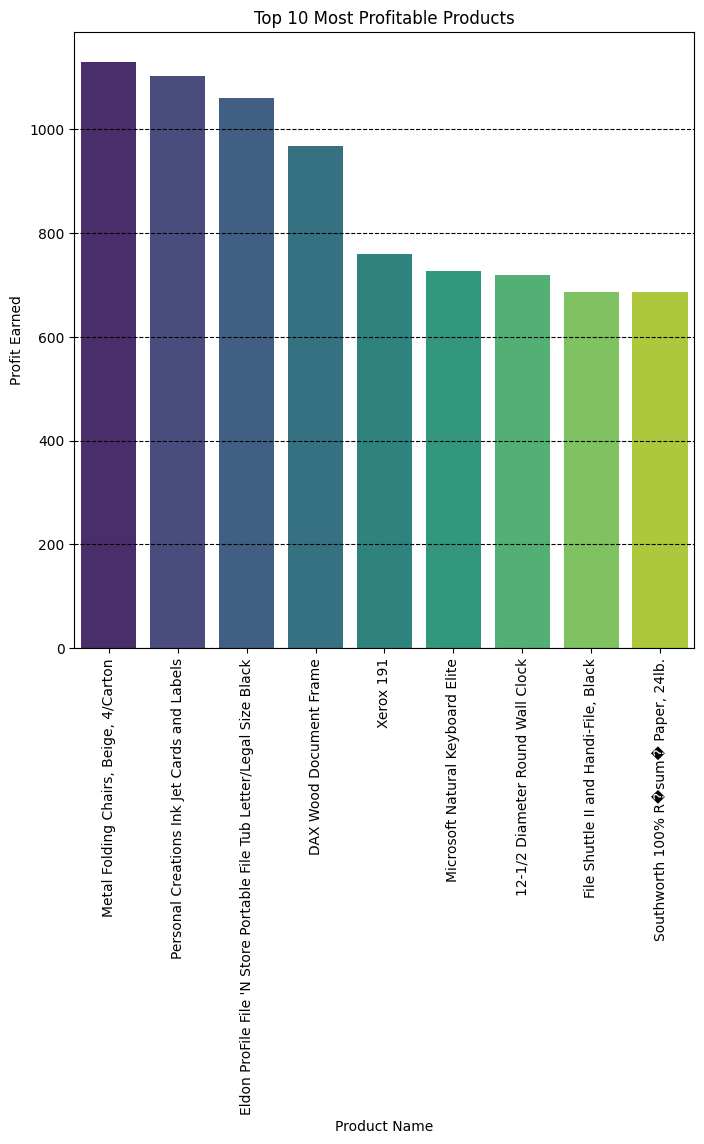

In [205]:
##plotting bar chart for top products and their profit
plt.figure(figsize=(8,8))
sns.barplot(x='Product Name',y='Total Profit',data = top_products,palette='viridis',hue='Product Name')
plt.title('Top 10 Most Profitable Products')
plt.xlabel("Product Name")
plt.ylabel("Profit Earned")
plt.xticks(rotation = 90)
plt.grid(axis='y',linestyle='--',color='k')
plt.show()

###- Top 10 Most Loss-Making Products: Use a bar chart to display the products with the highest total losses (negative profit)

In [206]:
## checking for most loss-making products
bottom_products = df.sort_values(by='Total Profit',ascending=True)[['Product Name','Total Profit']].head(10)
bottom_products["Total Profit"] = bottom_products["Total Profit"].abs()
bottom_products.rename(columns={'Total Profit':'Total Loss'},inplace=True)
bottom_products

,Product Name,Total Loss
3297,Wilson Jones Century Plastic Molded Ring Binders,578.0291
3941,Wilson Jones Legal Size Ring Binders,534.3570
4561,Binding Machine Supplies,519.8094
917,Canvas Sectional Post Binders,433.0746
1903,GBC Premium Transparent Covers with Diagonal L...,429.6704
2601,Fellowes Basic Home/Office Series Surge Protec...,423.6672
1638,GBC Durable Plastic Covers,421.0560
4565,"Avery Trapezoid Extra Heavy Duty 4"" Binders",411.0120
2840,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi...",382.1742
3089,Panasonic KX TS208W Corded phone,376.2432


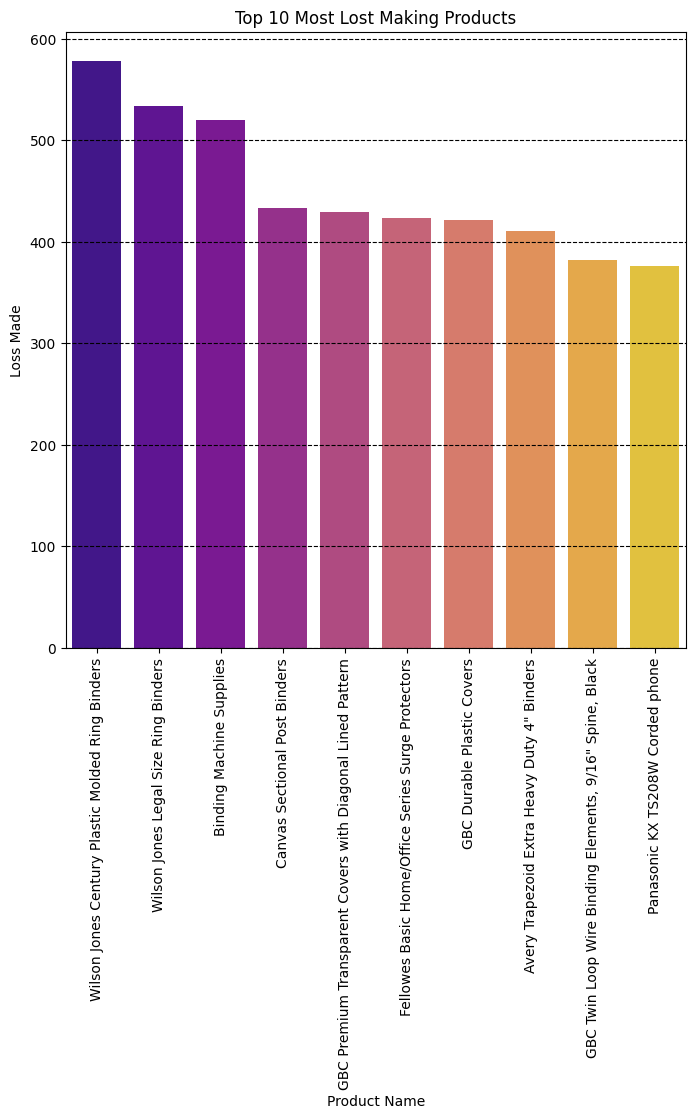

In [207]:
##plotting bar chart for most lost mmaking products and their loss
plt.figure(figsize=(8,8))
sns.barplot(x='Product Name',y='Total Loss',data = bottom_products,palette='plasma',hue='Product Name')
plt.title('Top 10 Most Lost Making Products')
plt.xlabel("Product Name")
plt.ylabel("Loss Made")
plt.xticks(rotation = 90)
plt.grid(axis='y',linestyle='--',color='k')
plt.show()

### - Sales vs. Profit Correlation: Use a scatter plot to visualize the correlation between Total Sales and Total Profit. Add a regression line to show the trend

In [208]:
### plotting Total Sales vs Total Profit Customer wise
customer_df

,Customer ID,Total Sales,Total Profit,Sales Quintile,Profit Quintile
0,AA-10315,98.740,35.0846,1,1
1,AA-10375,895.460,169.7082,2,3
2,AA-10480,190.486,77.6930,1,2
3,AA-10645,3499.654,270.2388,5,3
4,AB-10015,517.920,124.7393,2,2
...,...,...,...,...,...
783,XP-21865,4030.220,458.4848,5,4
784,YC-21895,1747.540,171.1770,3,3
785,YS-21880,4082.440,273.9104,5,4
786,ZC-21910,6457.064,674.1141,5,5


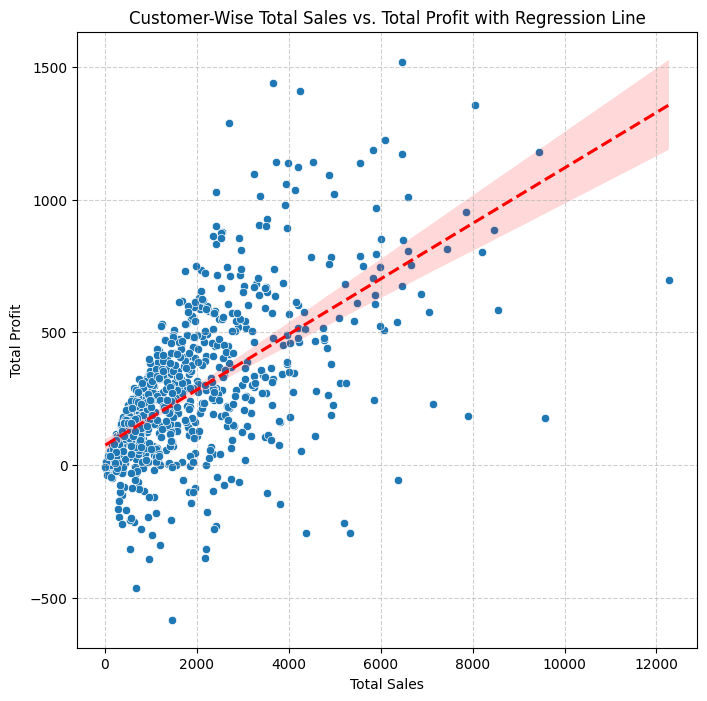

In [209]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Total Sales',y='Total Profit',data = customer_df)
sns.regplot(x='Total Sales',y='Total Profit',data = customer_df,color = 'red',scatter = False,line_kws={'linestyle': '--'})
plt.title('Customer-Wise Total Sales vs. Total Profit with Regression Line')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### ~ Joint Distribution of Sales and Profit: Create a joint plot to analyze the relationship between Total Sales and Total Profit across different products

In [210]:
## firstly we need to create a product_df to analyse total sales and total profit
product_df = df.groupby('Product Name')[['Total Revenue','Total Profit']].sum().reset_index()
product_df

,Product Name,Total Revenue,Total Profit
0,"""While you Were Out"" Message Book, One Form pe...",53.424,20.0340
1,"#10 Gummed Flap White Envelopes, 100/Box",79.296,34.6920
2,#10 Self-Seal White Envelopes,8.872,3.2161
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",658.140,292.7156
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",552.368,200.3208
...,...,...,...
1540,iHome FM Clock Radio with Lightning Dock,559.920,34.9950
1541,iKross Bluetooth Portable Keyboard + Cell Phon...,821.240,217.8800
1542,iOttie HLCRIO102 Car Mount,719.640,35.9820
1543,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,899.500,431.7600


<Figure size 800x600 with 0 Axes>

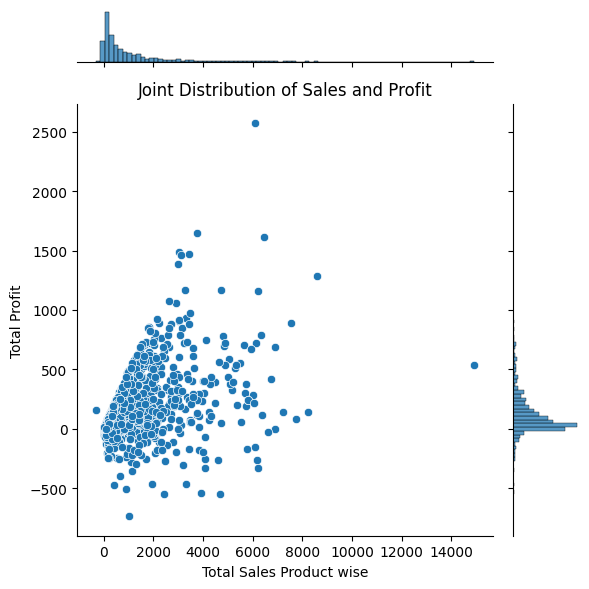

In [211]:
## plotting the joint plot on basis of above data
plt.figure(figsize=(8,6))
sns.jointplot(x='Total Revenue',y='Total Profit',data = product_df)
plt.title('Joint Distribution of Sales and Profit')
plt.xlabel('Total Sales Product wise')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

##Customer Segmentation and Analysis

### - Customer Sales Quintile vs. Customer Profit Quintile: Create a heatmap or cross-tabulation to explore the relationship between customers' sales and profit quintiles. This will help identify which segments of customers are most valuable

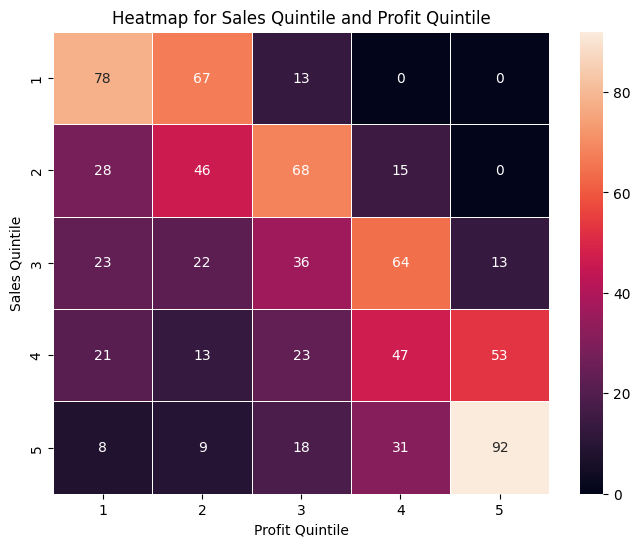

In [212]:
## heatmap for sales quintile and profit quintile
plt.figure(figsize = (8,6))
sns.heatmap(cross_relation_matrix,annot=True,linewidth=0.5)
plt.title("Heatmap for Sales Quintile and Profit Quintile")
plt.xlabel("Profit Quintile")
plt.ylabel("Sales Quintile")
plt.show()

## ~ Understand how different product categories perform across customer segments: Create a pivot table to analyze the total Sales and total Profit by Category and Segment. Sort the pivot table to highlight the most profitable and least profitable combinations of Category and Segment


In [213]:
pivot_df = df.pivot_table(index='Segment',columns='Category',values=['Total Revenue','Total Profit'],aggfunc='sum').reset_index()
pivot_df

Segment Total Profit                             Total Revenue  \
Category                 Furniture Office Supplies  Technology     Furniture   
0            Consumer   17921.3708      63343.1531  32226.5523   233161.4166   
1           Corporate    7740.9258      36000.1627  12849.1477   148500.7596   
2         Home Office    7185.8111      25548.5410   6981.7199    91693.5714   

                                      
Category Office Supplies  Technology  
0             315870.864  228824.484  
1             171980.204   91622.004  
2             112230.265   54138.117

In [214]:
profit_df = pivot_df['Total Profit'].copy()
profit_df['Segment'] = pivot_df['Segment']
profit_df

Category,Furniture,Office Supplies,Technology,Segment
0,17921.3708,63343.1531,32226.5523,Consumer
1,7740.9258,36000.1627,12849.1477,Corporate
2,7185.8111,25548.5410,6981.7199,Home Office


In [215]:
profit_updated = pd.melt(
    profit_df,
    id_vars='Segment',
    var_name='Category',
    value_name='Total_Profit'
)

profit_updated = profit_updated.sort_values(by=['Segment','Total_Profit'],ascending=[True,False])
profit_updated

,Segment,Category,Total_Profit
3,Consumer,Office Supplies,63343.1531
6,Consumer,Technology,32226.5523
0,Consumer,Furniture,17921.3708
4,Corporate,Office Supplies,36000.1627
7,Corporate,Technology,12849.1477
1,Corporate,Furniture,7740.9258
5,Home Office,Office Supplies,25548.5410
2,Home Office,Furniture,7185.8111
8,Home Office,Technology,6981.7199


In [216]:
revenue_df = pivot_df['Total Revenue'].copy()
revenue_df['Segment'] = pivot_df['Segment']
revenue_df

Category,Furniture,Office Supplies,Technology,Segment
0,233161.4166,315870.864,228824.484,Consumer
1,148500.7596,171980.204,91622.004,Corporate
2,91693.5714,112230.265,54138.117,Home Office


In [217]:
revenue_updated = pd.melt(
    revenue_df,
    id_vars='Segment',
    var_name = 'Category',
    value_name= 'Total_Revenue'
)
revenue_updated = revenue_updated.sort_values(by=['Segment','Total_Revenue'],ascending=[True,False])
revenue_updated

,Segment,Category,Total_Revenue
3,Consumer,Office Supplies,315870.8640
0,Consumer,Furniture,233161.4166
6,Consumer,Technology,228824.4840
4,Corporate,Office Supplies,171980.2040
1,Corporate,Furniture,148500.7596
7,Corporate,Technology,91622.0040
5,Home Office,Office Supplies,112230.2650
2,Home Office,Furniture,91693.5714
8,Home Office,Technology,54138.1170


##So clearly we can say the most profitable combinations are [(Consumer - Office Supplies),(Corporate - Office Supplies),(Home Office - Office Supplies)] and the least profit making combinations are [(consumer - Technology), (Corporate - Technology), (Home Office - Technology)]



#*  Shipping and Delivery Analysis



## ~ Distribution of Shipping Urgency: Visualize the distribution of orders by Shipping Urgency using a pie chart or bar chart

In [218]:
data = df.groupby('Shipping Urgency')['Row ID'].count().reset_index()
data

,Shipping Urgency,Row ID
0,Immediate,914
1,Standard,2652
2,Urgent,646


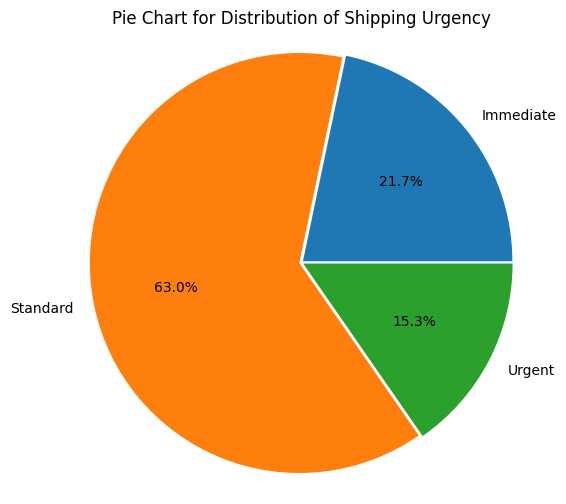

In [219]:
# extracting values and labels from data
values = data['Row ID']
labels = data['Shipping Urgency']
explode = [0.01,0.01,0.01]

# plotting a pie chart for order distribution
plt.figure(figsize=(6,6))
plt.pie(values,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title('Pie Chart for Distribution of Shipping Urgency')
plt.axis('equal')
plt.show()

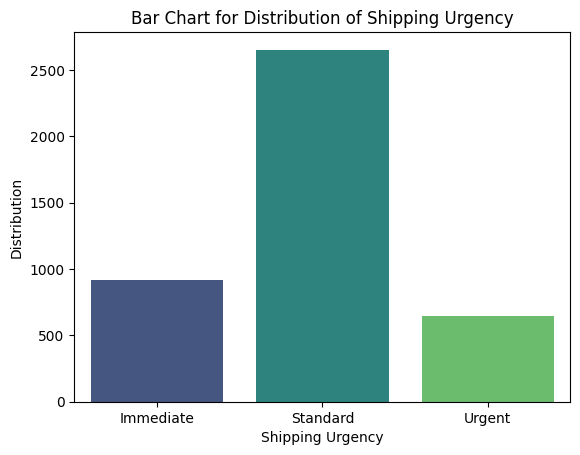

In [220]:
#plotting a bar chart for order distribution
sns.barplot(data=data,x='Shipping Urgency',y='Row ID',palette='viridis',hue='Shipping Urgency')
plt.title('Bar Chart for Distribution of Shipping Urgency')
plt.xlabel('Shipping Urgency')
plt.ylabel('Distribution')
plt.show()

## ~ Days to Ship vs. Profit: Use a violin plot to explore the distribution of Profit across different Days to Ship categories. This will help analyze whether faster shipping correlates with higher or lower profitability


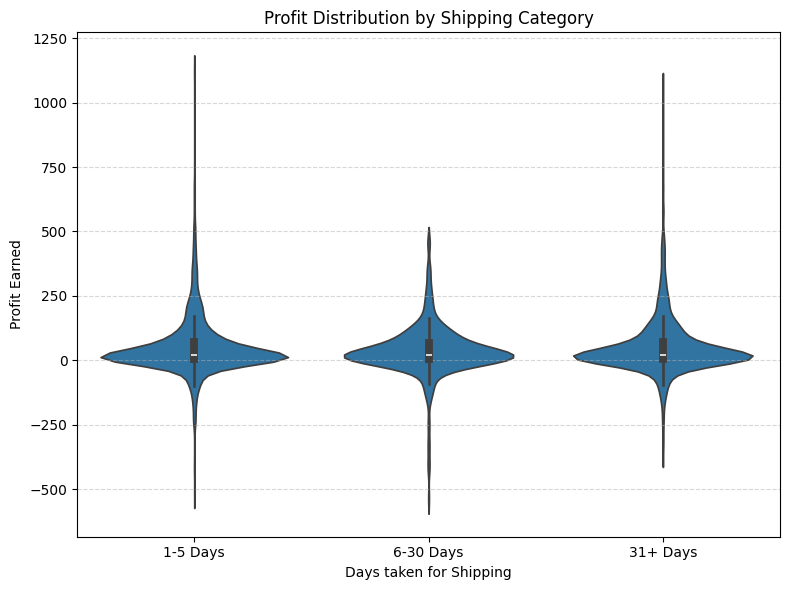

In [221]:
#need to divide Days to Ship into categories i.e ship category
bins = [0, 5, 30, float('inf')]
labels = ['1-5 Days', '6-30 Days', '31+ Days']
df['Ship Category'] = pd.cut(df['Days to Ship'], bins=bins, labels=labels)

#Plotting violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Ship Category', y='Total Profit')
plt.title('Profit Distribution by Shipping Category')
plt.xlabel('Days taken for Shipping')
plt.ylabel('Profit Earned')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### The violin plot suggests that profit distribution does not depend much on shipping days as it is almost same for the all three categories

## ~ Shipping Mode and Profitability: Create a grouped bar chart to compare the profitability of different shipping modes (e.g., Standard Class, First Class)

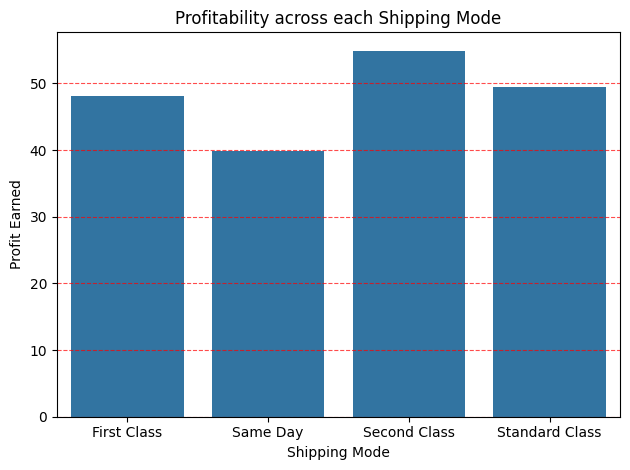

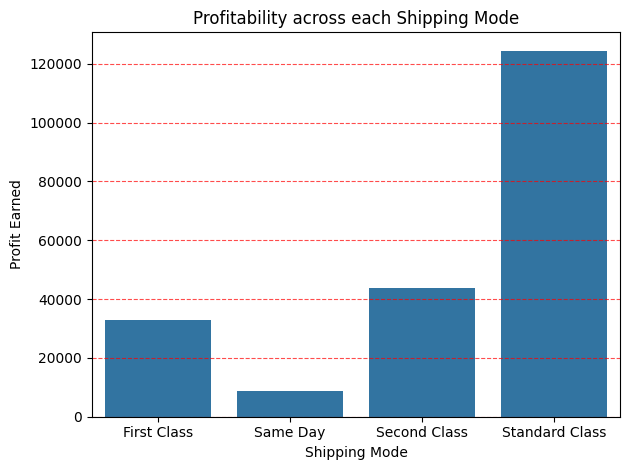

In [222]:
# grouping data on basis of shipping mode and analysing total profit per mode
## we will use avg profit as number of orders per class may vary hence profit will vary significantly
grouped_df = df.groupby('Ship Mode').agg({'Total Profit':'sum','Row ID':'count'}).reset_index()
grouped_df['Avg Profit'] = round(grouped_df['Total Profit']/grouped_df['Row ID'],2)
grouped_df

## plotting the bar chart for average profit per shipping mode
sns.barplot(data=grouped_df,x='Ship Mode',y='Avg Profit')
plt.title('Profitability across each Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Profit Earned')
plt.grid(axis='y',linestyle='--',alpha=0.7,color='r')
plt.tight_layout()
plt.show()

## plotting the bar chart for total profit per shipping mode
sns.barplot(data=grouped_df,x='Ship Mode',y='Total Profit')
plt.title('Profitability across each Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Profit Earned')
plt.grid(axis='y',linestyle='--',alpha=0.7,color='r')
plt.tight_layout()
plt.show()

## Here as we observed there is not much significant difference between average profit earned within each shipping mode, still "Second Class" is most profitable amongst all, but if we plot total profit for each shipping mode there will be a significant difference as number of orders per shipping mode vary significantly

### We can visualise profit for each shipping mode sub categorised by segment

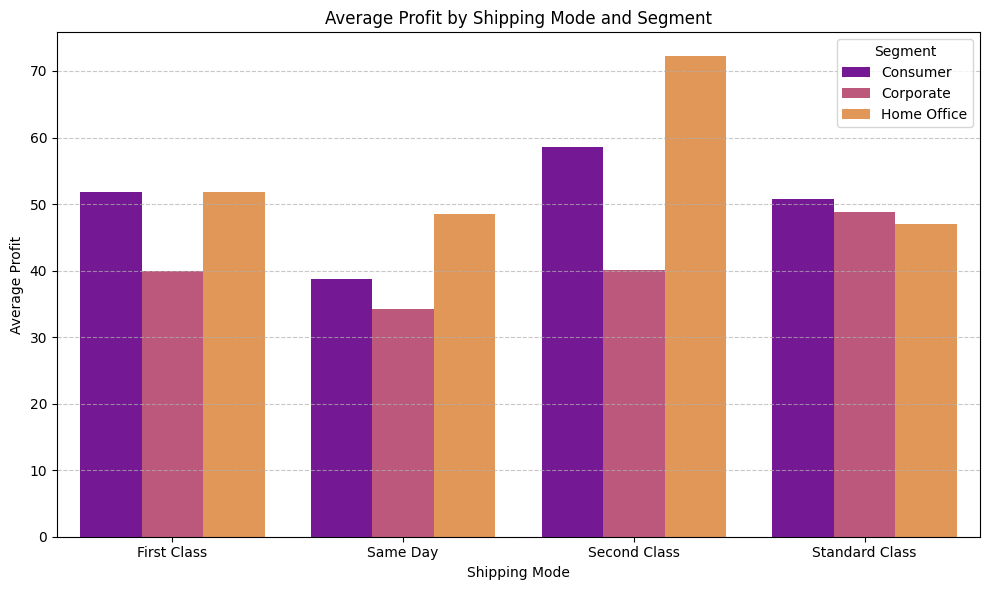

In [223]:
#preparing data for plotting avg profit per segment in each shipping moderrddfdc vfd
grouped_df = df.groupby(['Ship Mode', 'Segment']).agg({'Total Profit': 'mean'}).reset_index()
grouped_df['Total Profit'] = grouped_df['Total Profit'].round(2)

# plotting grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Ship Mode', y='Total Profit', hue='Segment', palette='plasma')

plt.title('Average Profit by Shipping Mode and Segment')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## ~ Using a pivot table, determine which shipping modes are most preferred across different regions and analyze the impact on total sales and profit. Create a pivot table that shows the count of Order IDs, total Sales, and total Profit for each Region and Ship Mode. Identify and print your insights

In [224]:
pivot_region = df.pivot_table(index = 'Region',columns='Ship Mode',values=['Order ID','Total Revenue','Total Profit'],aggfunc={'Order ID':'count','Total Revenue':'sum','Total Profit':'sum'}).reset_index()
pivot_region

Region    Order ID                                       \
Ship Mode          First Class Same Day Second Class Standard Class   
0          Central         149       50          180            588   
1             East         203       58          213            686   
2            South         106       31          132            422   
3             West         226       78          271            819   

          Total Profit                                        Total Revenue  \
Ship Mode  First Class   Same Day Second Class Standard Class   First Class   
0            5419.4389  1101.0470    6835.4934     18225.9742    54386.6694   
1            9549.6858  2370.1218   12051.8218     29969.9504    50475.4460   
2            5634.3923   938.5914    6927.8593     24035.0807    30785.5880   
3           12324.0119  4252.6121   17890.3208     52270.9826    86819.8960   

                                                  
Ship Mode   Same Day Second Class Standard Class  
0          10822.276   61733.7604    193487.0528  
1          13057.106   71671.9870    196541.1790  
2           8577.241   39694.7590    152092.3060  
3          41668.193  108995.4010    327212.8250

In [225]:
most_prefered = pivot_region['Order ID'].copy()
most_prefered['Region'] = pivot_region['Region']
most_prefered = pd.melt(most_prefered,
                        id_vars='Region',
                        var_name='Ship Mode',
                        value_name='Num_of_Orders'
                        )
most_prefered.groupby(['Region'])[['Ship Mode','Num_of_Orders']].max().reset_index()


,Region,Ship Mode,Num_of_Orders
0,Central,Standard Class,588
1,East,Standard Class,686
2,South,Standard Class,422
3,West,Standard Class,819


### So clearly we can see that Standard Class is most preferred amongst all the Regions

In [226]:
# analysing profit region wise
most_profitable = pivot_region['Total Profit'].copy()
most_profitable['Region'] = pivot_region['Region']
most_profitable = pd.melt(most_profitable,
                        id_vars='Region',
                        var_name='Ship Mode',
                        value_name='Total Profit'
                        )
most_profitable.groupby(['Region'])[['Ship Mode','Total Profit']].max().reset_index()

,Region,Ship Mode,Total Profit
0,Central,Standard Class,18225.9742
1,East,Standard Class,29969.9504
2,South,Standard Class,24035.0807
3,West,Standard Class,52270.9826


###So according to our previous analysis it was expected that standard class would be most profitable because it had maximum number of orders per region

In [227]:
#To analyse average profit per region
most_prefered_1 = pivot_region['Order ID'].copy()
most_prefered_1['Region'] = pivot_region['Region']
most_prefered_1 = pd.melt(most_prefered_1,
                        id_vars='Region',
                        var_name='Ship Mode',
                        value_name='Num_of_Orders'
                        )
most_profitable_1 = pivot_region['Total Profit'].copy()
most_profitable_1['Region'] = pivot_region['Region']
most_profitable_1 = pd.melt(most_profitable_1,
                        id_vars='Region',
                        var_name='Ship Mode',
                        value_name='Total Profit'
                        )
final_df = pd.merge(most_profitable_1,most_prefered_1,on=['Region','Ship Mode'],how='inner')
final_df['Avg Profit'] = final_df['Total Profit']/final_df['Num_of_Orders']
final_df.groupby('Region')[['Ship Mode','Avg Profit']].max().reset_index()

,Region,Ship Mode,Avg Profit
0,Central,Standard Class,37.974963
1,East,Standard Class,56.581323
2,South,Standard Class,56.955168
3,West,Standard Class,66.015944


###So now we can finally compute and say that Standard Class is the most profitable class across all regions...

In [228]:
# analysing total sales i.e total revenue earned
most_sales = pivot_region['Total Revenue'].copy()
most_sales['Region'] = pivot_region['Region']
most_sales = pd.melt(most_sales,
                        id_vars='Region',
                        var_name='Ship Mode',
                        value_name='Total Sales'
                        )
most_sales.groupby(['Region'])[['Ship Mode','Total Sales']].max().reset_index()

,Region,Ship Mode,Total Sales
0,Central,Standard Class,193487.0528
1,East,Standard Class,196541.1790
2,South,Standard Class,152092.3060
3,West,Standard Class,327212.8250


### As expected from our above analysis Standard Class has generated the maximum sales across all regions

## ~ Regional Sales and Profitability

### - Sales and Profit by Region: Use a map or bar chart to visualize total sales and profit by region or state. This will highlight which regions are the most profitable

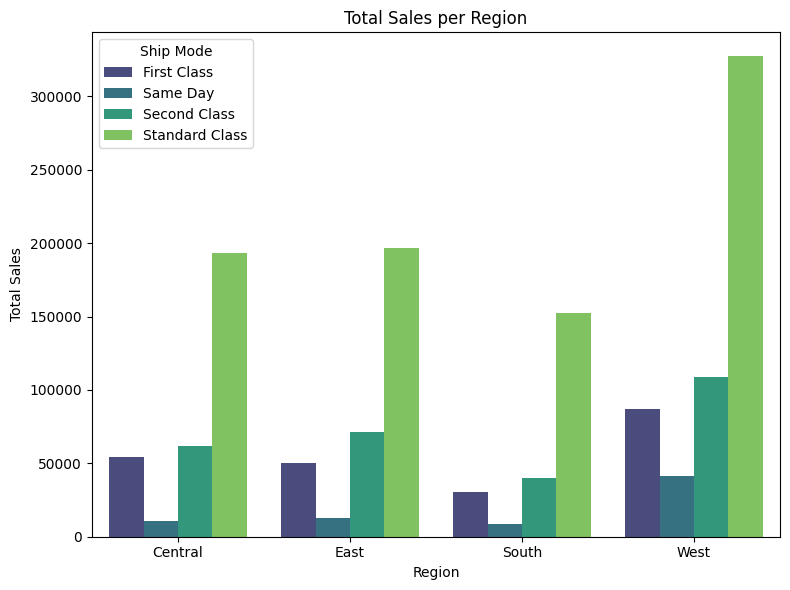

In [229]:
#visualising total sales and total profit region wise
#firstly total sales
plt.figure(figsize=(8,6))
sns.barplot(data=most_sales,x='Region',y='Total Sales',hue='Ship Mode',palette='viridis')
plt.title('Total Sales per Region')
plt.tight_layout()
plt.show()

###It's very evident that Standard Class has the maximum sales per region as analysed before

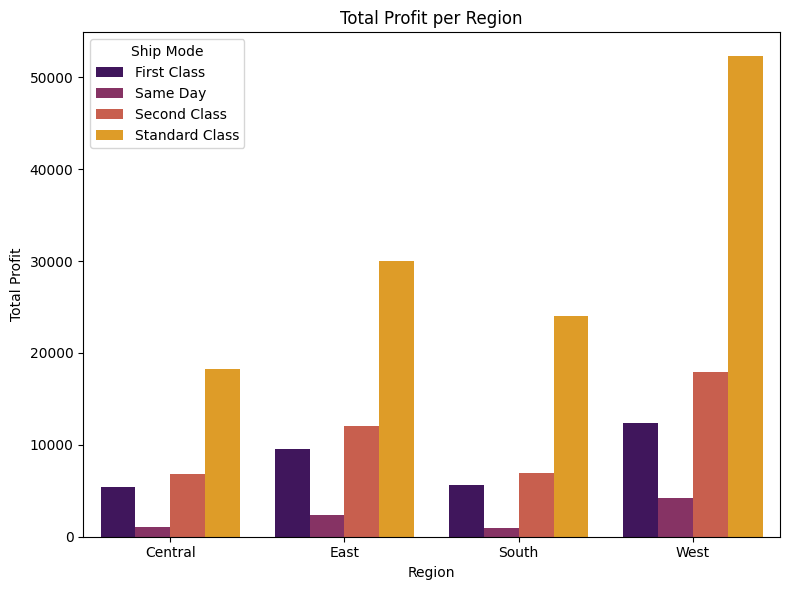

In [230]:
#now total profit per region
plt.figure(figsize=(8,6))
sns.barplot(data=most_profitable,x='Region',y='Total Profit',hue='Ship Mode',palette='inferno')
plt.title('Total Profit per Region')
plt.tight_layout()
plt.show()

###So clearly standard class is most profitable across all regions

## ~ State-wise Profitability: Create a pivot table to summarize the profitability of each state. Highlight the top and bottom states based on profitability

In [231]:
# pivot_state = df.pivot_table(index='State',values='Total Profit',aggfunc='mean')
#  similar but easier to understand
pivot_state = df.groupby('State')['Total Profit'].mean().reset_index()
pivot_state = pivot_state.sort_values(by='Total Profit',ascending=False)
pivot_state.rename(columns={'Total Profit':"Average Profit"},inplace=True)
pivot_state

,State,Average Profit
43,Vermont,236.617233
46,West Virginia,201.880000
22,Mississippi,143.127211
2,Arkansas,124.271705
12,Indiana,106.268811
0,Alabama,102.654283
20,Michigan,101.826967
44,Virginia,101.675067
27,New Hampshire,100.520913
13,Iowa,99.771582


In [232]:
# top 5 profitable states
top_5_states = pivot_state.head(5)

# top 5 least profitable states
bottom_5_states = pivot_state.tail(5)

print("Top 5 Profitabe states are:-\n")
print(top_5_states)
print('-'*200)
print('Top 5 Least Profitabe states are:-\n')
print(bottom_5_states)

Top 5 Profitabe states are:-

            State  Average Profit
43        Vermont      236.617233
46  West Virginia      201.880000
22    Mississippi      143.127211
2        Arkansas      124.271705
12        Indiana      106.268811
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Top 5 Least Profitabe states are:-

           State  Average Profit
40     Tennessee       15.950412
41         Texas        8.490118
33          Ohio        7.475017
36  Pennsylvania        4.814762
11      Illinois       -3.653133


###Here we can easily analyse our top 5 most profitable states and least profitable states where (-ve) sign refers to loss in a particular state

## ~ Correlation between State and Profit: Use a correlation plot to identify any patterns or relationships between the states and the profitability of orders

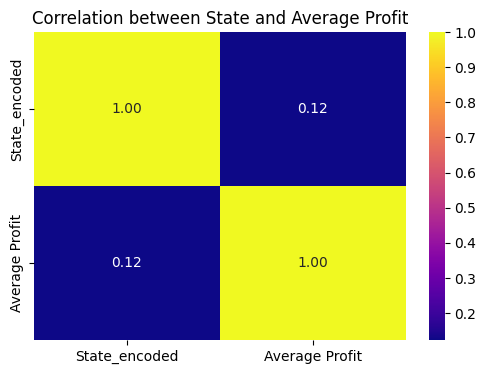

In [233]:
#To find a proper correlation matrix between states and profit we need to conver states in numerical column

#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Encoding State Column
pivot_state['State_encoded'] = le.fit_transform(pivot_state['State'])

#Preparing correlation matrix
correlation_matrix = pivot_state[['State_encoded','Average Profit']].corr()

#plotting the correlation_matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation between State and Average Profit')
plt.show()



###we can infer that the state does not show a strong linear trend in influencing profit. But as an individual some states are profitable and some states are loss bearing and we can visualise that through a bar chart below

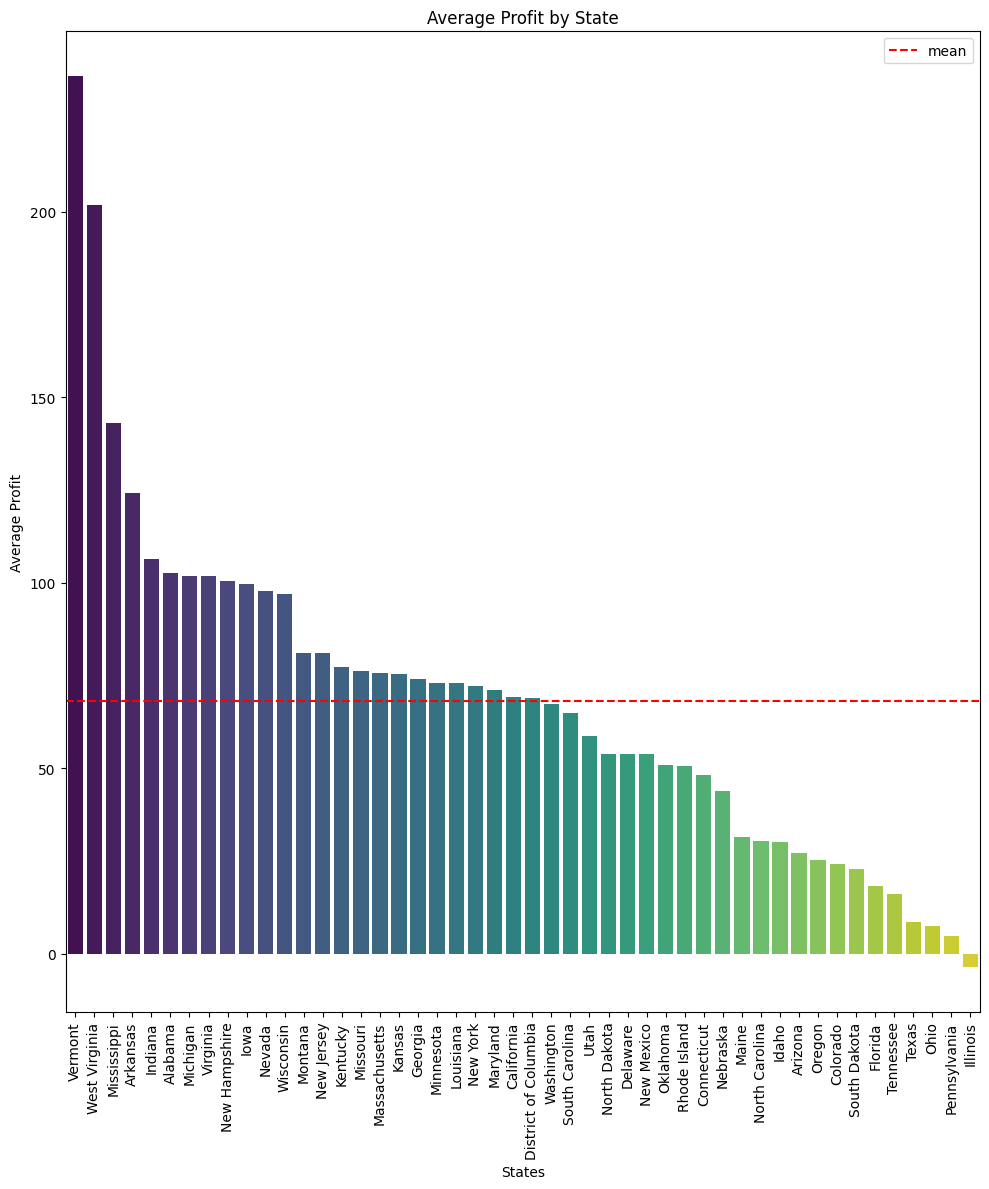

In [234]:
#plotting barplot
plt.figure(figsize=(10, 12))
sns.barplot(data=pivot_state,x='State',y='Average Profit',palette ='viridis',hue='State')
plt.axhline(pivot_state['Average Profit'].mean(),color='red',linestyle='--',label='mean')
plt.title('Average Profit by State')
plt.xlabel('States')
plt.ylabel('Average Profit')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### As suggested from above heatmap some states are highly profitable like [Vermont,West Virginia,Mississippi,Virginia, New Hampshire, Indiana, Alabama ] and some of the states are not so profitable or loss bearing like [Illinois, Florida, Tennessee, Texas, Ohio]

## ~ Discount and Pricing Analysis

### -> Impact of Discounts on Profitability: Use a scatter plot with a trend line to analyze how different levels of discount affect profitability

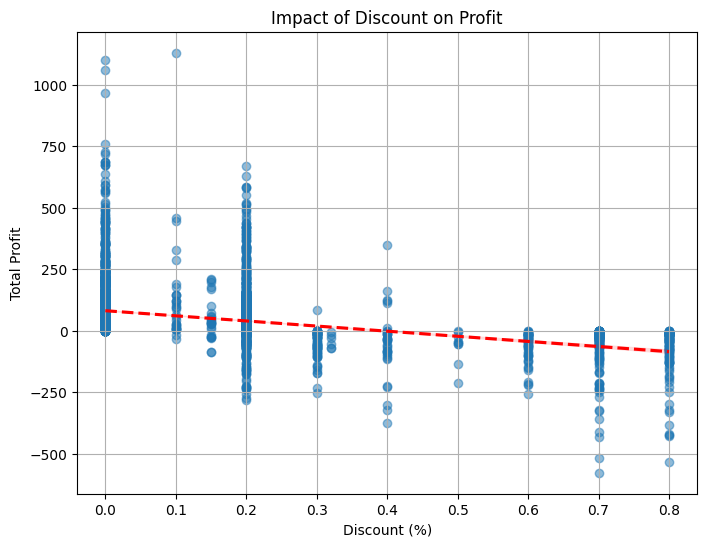

In [235]:
#plotting a regplot with scatter and regression line
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Discount', y='Total Profit', scatter_kws={'alpha':0.5}, line_kws={'color':'red','linestyle':'--'})
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


###Clearly the graph depicts a negative correlation between discount and profit.Increasing the discount to very high margins such as 0.7 or 0.8 leads to loss bearing orders and hence we can infer that giving more discount may generate more sales but not always generate more profit.

## ~ Original Price vs. Discounted Price: Create a line plot to compare the original price and the discounted price across various product categories or sub-categories


In [236]:
# creating a column discounted price i.e original price - discount price
df['Discounted Price'] = df['Original Price'] - df['Discount Price']
df[['Original Price','Discounted Price']]

,Original Price,Discounted Price
0,261.96,261.960
1,14.62,14.620
3,48.86,48.860
4,19.44,15.552
7,665.88,665.880
...,...,...
5004,36.24,36.240
5005,79.99,79.990
5006,31.56,25.248
5007,91.96,91.960


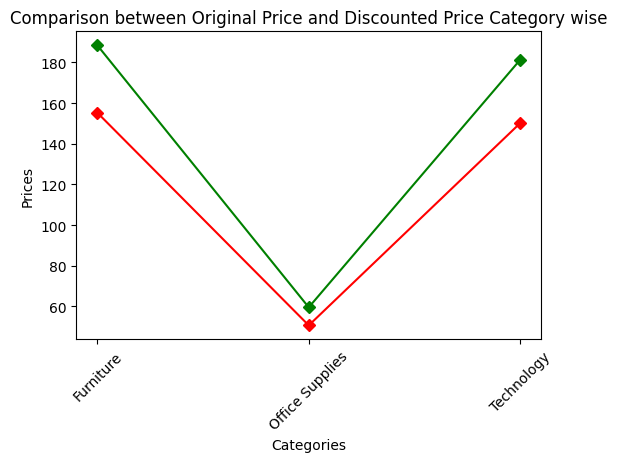

In [237]:
#prepare data for original price and discounted price category wise
data = df.groupby('Category')[['Original Price','Discounted Price']].mean().reset_index()

#plot graph
plt.figure(figsize=(6,4))
plt.plot(data['Category'],data['Original Price'],color='green',marker='D',label='Original Price')
plt.plot(data['Category'],data['Discounted Price'],color='red',marker='D',label='Discounted Price')
plt.title('Comparison between Original Price and Discounted Price Category wise')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.xticks(rotation=45)
plt.show()

###We can infer that Average Prices for Office Supplies is comparitively very less than that of Furniture and Technology

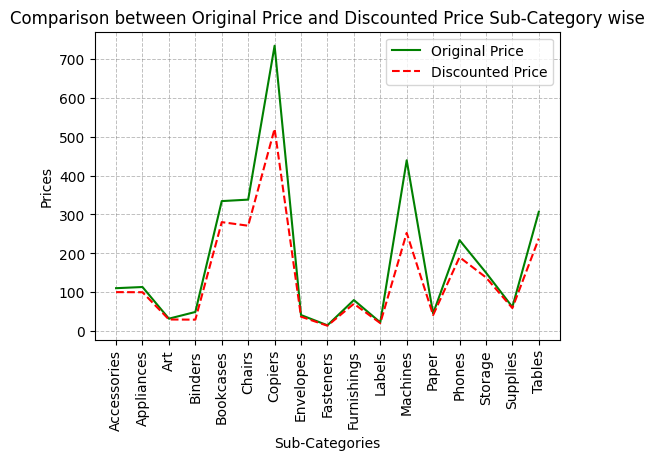

In [238]:
#prepare data for original price and discounted price sub-category wise
data = df.groupby('Sub-Category')[['Original Price','Discounted Price']].mean().reset_index()

#plot graph
plt.figure(figsize=(6,4))
plt.plot(data['Sub-Category'],data['Original Price'],color='green',label='Original Price')
plt.plot(data['Sub-Category'],data['Discounted Price'],color='red',label='Discounted Price',linestyle='--')
plt.title('Comparison between Original Price and Discounted Price Sub-Category wise')
plt.xlabel('Sub-Categories')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True,linestyle='--',color='gray',alpha=0.5,linewidth=0.7)
plt.show()

###Here we can infer that heavy discounts were given in sub-categories like 'Bookcases','Chairs','Copiers','Machines', and very less discount is given in sub-categories like 'Art','Envelopes','Fasteners','Labels','Paper',etc. this difference may be due to high ad low margins.

In [239]:
# analysing trends within sub-categories of a common category
data = df.groupby(['Category','Sub-Category'])[['Original Price','Discounted Price']].mean().reset_index()
furniture_df = data[data['Category']=='Furniture']
office_df = data[data['Category']=='Office Supplies']
tech_df = data[data['Category']=='Technology']

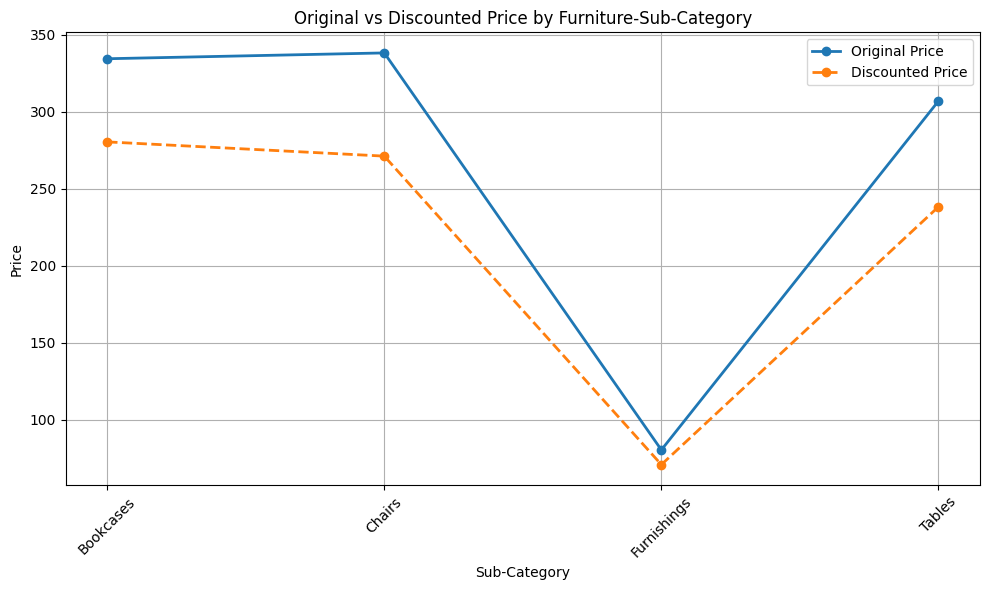

In [240]:
# Set index to Sub-Category
furniture_df.set_index('Sub-Category', inplace=True)

# Plot
plt.figure(figsize=(10,6))
plt.plot(furniture_df.index, furniture_df['Original Price'], marker='o', label='Original Price', linewidth=2)
plt.plot(furniture_df.index, furniture_df['Discounted Price'], marker='o', label='Discounted Price', linewidth=2, linestyle='--')
plt.title('Original vs Discounted Price by Furniture-Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


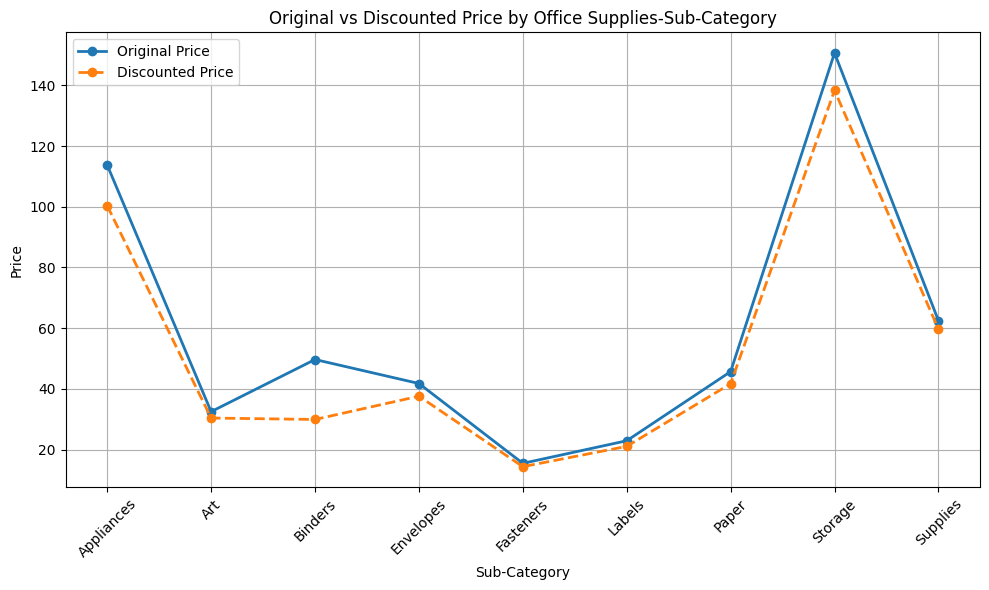

In [241]:
# Set index to Sub-Category
office_df.set_index('Sub-Category', inplace=True)

# Plot
plt.figure(figsize=(10,6))
plt.plot(office_df.index, office_df['Original Price'], marker='o', label='Original Price', linewidth=2)
plt.plot(office_df.index, office_df['Discounted Price'], marker='o', label='Discounted Price', linewidth=2, linestyle='--')
plt.title('Original vs Discounted Price by Office Supplies-Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

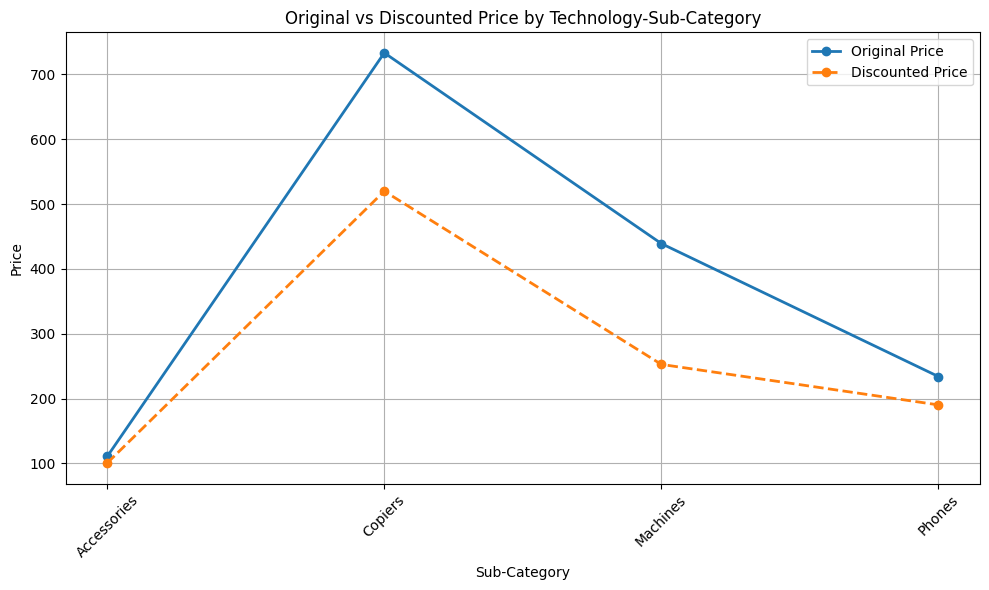

In [242]:
# Set index to Sub-Category
tech_df.set_index('Sub-Category', inplace=True)

# Plot
plt.figure(figsize=(10,6))
plt.plot(tech_df.index, tech_df['Original Price'], marker='o', label='Original Price', linewidth=2)
plt.plot(tech_df.index, tech_df['Discounted Price'], marker='o', label='Discounted Price', linewidth=2, linestyle='--')
plt.title('Original vs Discounted Price by Technology-Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###Now we have completely analysed original price and discounted price for our each category and sub-categories within each category

## ~ Sales and Profit Trends Over Time: Use a time series plot to analyze how sales and profit have trended over the years or months. This will help in identifying any seasonal patterns

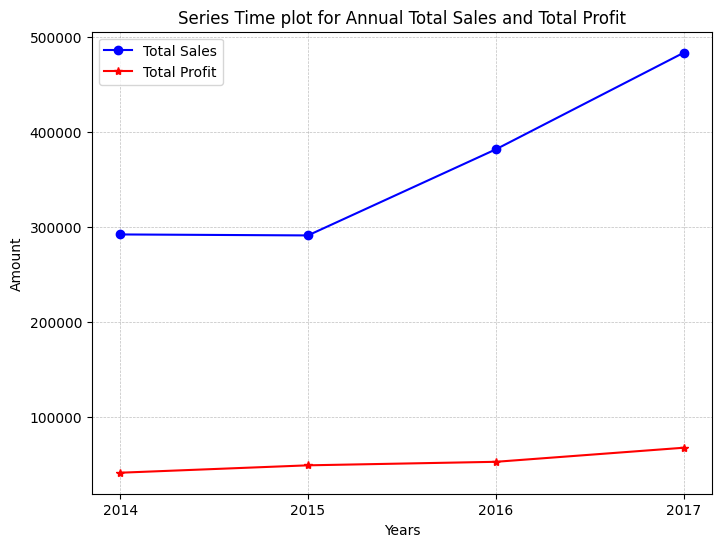

In [243]:
#convert data into year wise periods
yearly_df = df.groupby([df['Order Date'].dt.to_period('Y')])[['Total Revenue','Total Profit']].sum().reset_index()
yearly_df['Order Date'] = yearly_df['Order Date'].astype('str')

#plot the graph
plt.figure(figsize=(8,6))
plt.plot(yearly_df['Order Date'],yearly_df['Total Revenue'],label='Total Sales',color='blue',marker='o')
plt.plot(yearly_df['Order Date'],yearly_df['Total Profit'],label='Total Profit',color='red',marker='*')
plt.title('Series Time plot for Annual Total Sales and Total Profit')
plt.xlabel('Years')
plt.ylabel('Amount')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.5,color='gray',linewidth=0.5)
plt.show()

###This plot shows that annual sales are very high but corresponding annual profit margin is not that high.
###Sales and Profit have increased gradually over 2015-2017


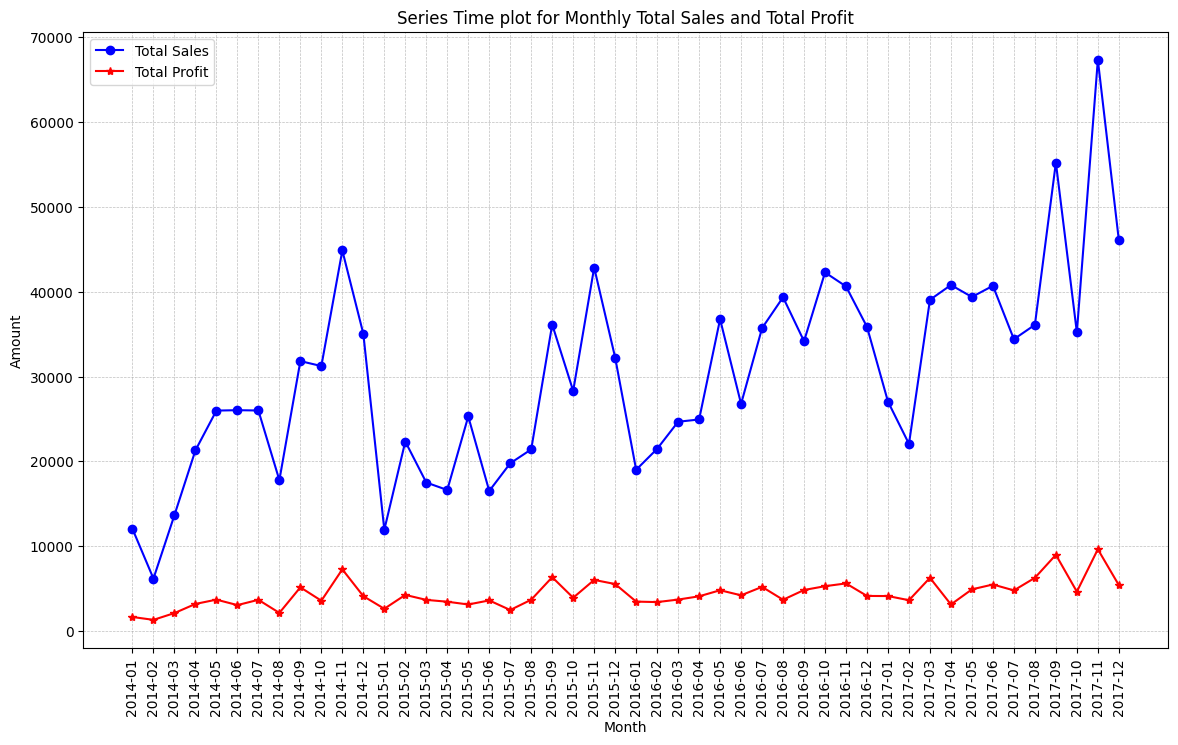

In [244]:
#convert data into month wise periods
monthly_df = df.groupby([df['Order Date'].dt.to_period('M')])[['Total Revenue','Total Profit']].sum().reset_index()
monthly_df['Order Date'] = monthly_df['Order Date'].astype('str')

#plot the graph
plt.figure(figsize=(14,8))
plt.plot(monthly_df['Order Date'],monthly_df['Total Revenue'],label='Total Sales',color='blue',marker='o')
plt.plot(monthly_df['Order Date'],monthly_df['Total Profit'],label='Total Profit',color='red',marker='*')
plt.title('Series Time plot for Monthly Total Sales and Total Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True,linestyle='--',alpha=0.5,color='gray',linewidth=0.5)
plt.show()

###Here we can notice a seasonal spike in sales and profit near the end of the year i.e in the months from october to december...then a sudden decrease near the january month...

## ~ Order Frequency by Month: Use a bar chart or line plot to show the number of orders placed each month. Highlight any months with unusually high or low order frequencies

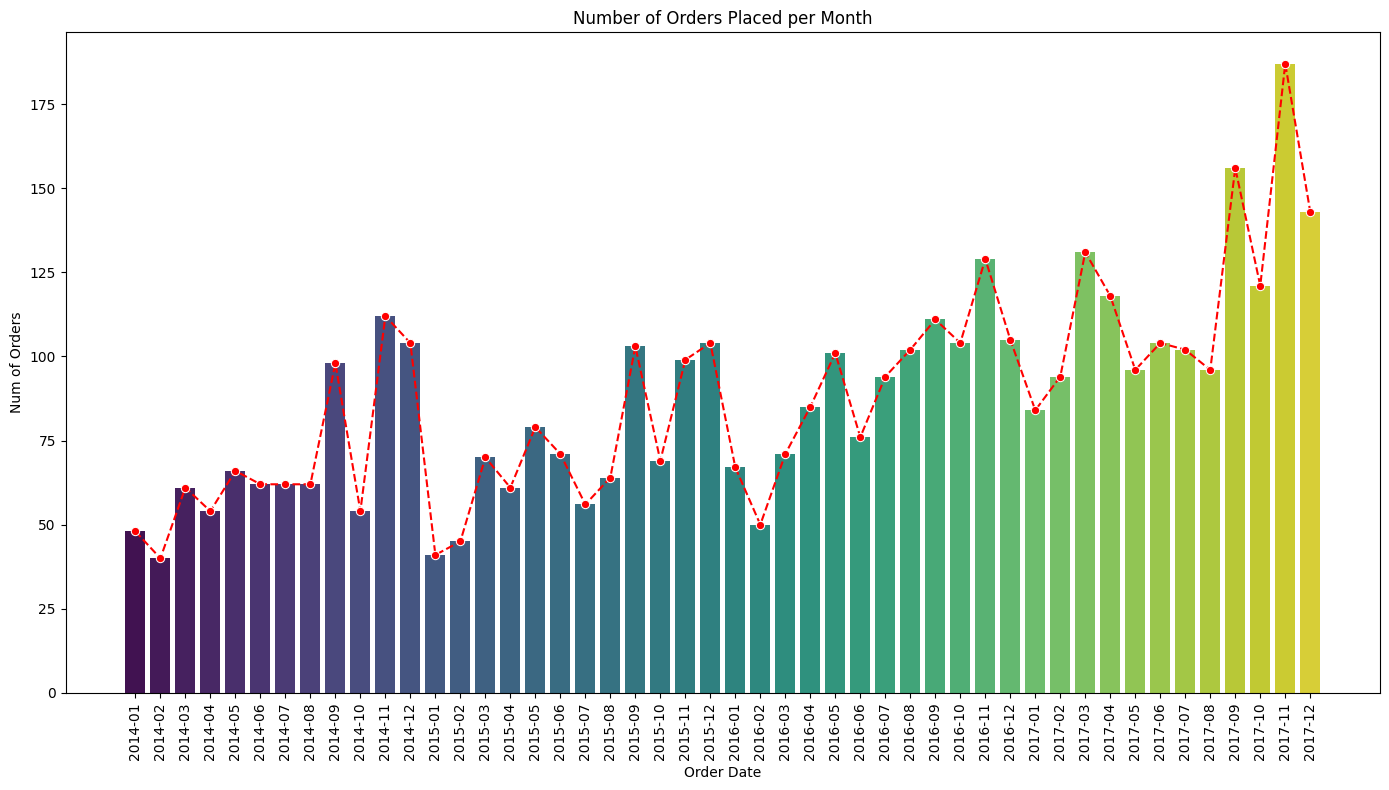

In [245]:
# Prepare monthly orders count data
orders_per_month = df.groupby(df['Order Date'].dt.to_period('M'))['Order ID'].count().reset_index()
orders_per_month.rename(columns={'Order ID': 'Num of Orders'}, inplace=True)
orders_per_month['Order Date'] = orders_per_month['Order Date'].astype(str)  # Convert Period to string for plotting

# Plot a bar graph with a line plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=orders_per_month, x='Order Date', y='Num of Orders', palette='viridis', ax=ax)
sns.lineplot(data=orders_per_month, x='Order Date', y='Num of Orders', color='red',linestyle='--', marker='o', ax=ax)

ax.set_title('Number of Orders Placed per Month')
ax.set_xlabel('Order Date')
ax.set_ylabel('Num of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


###We can observe that number of orders has gradually increased over time with some seasonal rise in specific months like september,november,december

## ~ Yearly Growth in Sales and Profit: Use a year-over-year growth chart to compare the sales and profit growth over different years



In [246]:
yearly_df['Profit Growth'] = yearly_df['Total Profit'].pct_change() * 100
yearly_df['Sales Growth'] = yearly_df['Total Revenue'].pct_change() * 100
yearly_df.fillna(0,inplace=True)
yearly_df

,Order Date,Total Revenue,Total Profit,Profit Growth,Sales Growth
0,2014,292007.1830,41048.8027,0.000000,0.000000
1,2015,290974.9621,48833.8494,18.965344,-0.353492
2,2016,381641.2695,52545.5232,7.600617,31.159488
3,2017,483398.2710,67369.2091,28.211130,26.662997


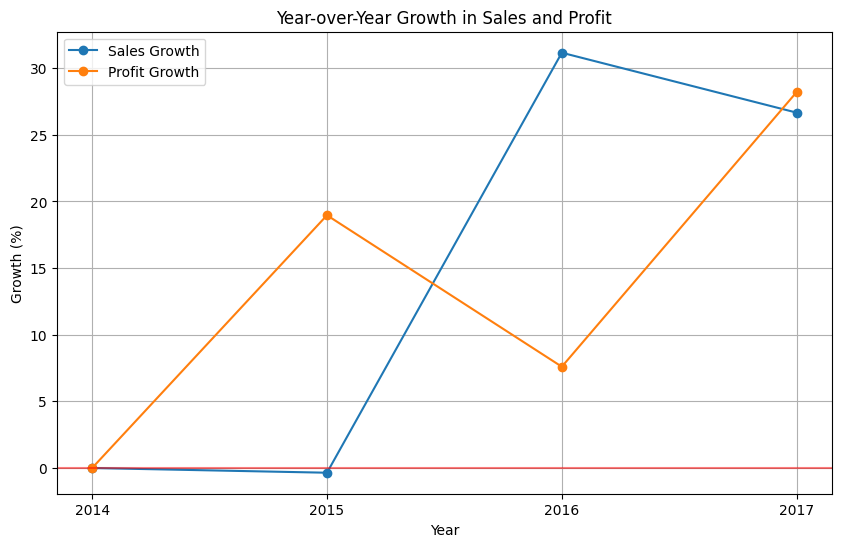

In [247]:
#plotting year over year growth in Sales and Profit
plt.figure(figsize=(10,6))
plt.plot(yearly_df['Order Date'], yearly_df['Sales Growth'], marker='o', label='Sales Growth')
plt.plot(yearly_df['Order Date'], yearly_df['Profit Growth'], marker='o', label='Profit Growth')
plt.axhline(0, color='red',alpha=0.5)
plt.title('Year-over-Year Growth in Sales and Profit')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend()
plt.grid(True)
plt.show()

###So from the above year-over-year graph we can spot that even though there was not enough grwoth in sales in [2014-2015] and [2016-2017] but there was significant growth in profit in those years, whereas when there was a huge growth in sales i.e[2015-2016] in that period there was not much growth in profit